### Credit card fraud detection - By Siddharth Nair 

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(style="darkgrid")
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import log_loss
from datetime import datetime as dt
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the dataset. Data CSV file has been renamed to data.csv
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Get the column names
print([i for i in data.columns]) #Here we could have simply done data.columns, but it would have returned a slightly different output. Index and object type additional informatinon.

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


#### Time is basically the number of seconds elapsed between a transaction and the first transaction in the dataset. We will leverage this to build a time based model.

In [4]:
#Get high level statistical view of the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


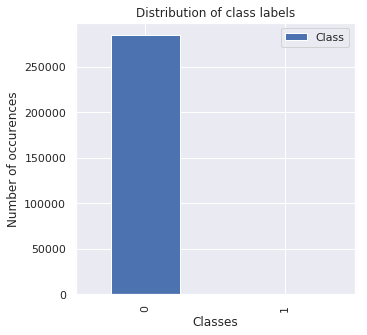

In [5]:
#Check the class distribution in the given data
data['Class'].value_counts().plot(figsize=(5,5),kind='bar',legend='True')
plt.title("Distribution of class labels")
plt.xlabel("Classes")
plt.ylabel("Number of occurences")
plt.show()

In [6]:
#Get percentage fradulent information
not_fraud=data[data['Class']==0].shape[0]
fraud=data[data['Class']==1].shape[0]
total=fraud+not_fraud

print("Percentage of Fradulent transaction: {}".format(np.round(100*fraud/total,4)))
print("Percentage of Non Fradulent transaction: {}".format(np.round(100*not_fraud/total,4)))

Percentage of Fradulent transaction: 0.1727
Percentage of Non Fradulent transaction: 99.8273


The dataset as such is severely imbalanced with the percentage of fraud transactions being 0.172% of the total data. The dataset contains only transformed numerical features which are a result of a PCA transormation. The original data is not provided to us due to security reasons and to protect the identity of the customers.

Having said that, there are two features which are not transformed using PCA - 'Time' and 'Amount'. These features are given as it is. The 'Time' feature basically says how much time for each transaction has elapsed since the first transaction in the dataset has taken place. The 'Amount' feature gives us information about the transaction amount for each of the transactions. The fraudulent transactions are denoted by class label 1 and the non fraudulent transactions are denoted by class label 0.

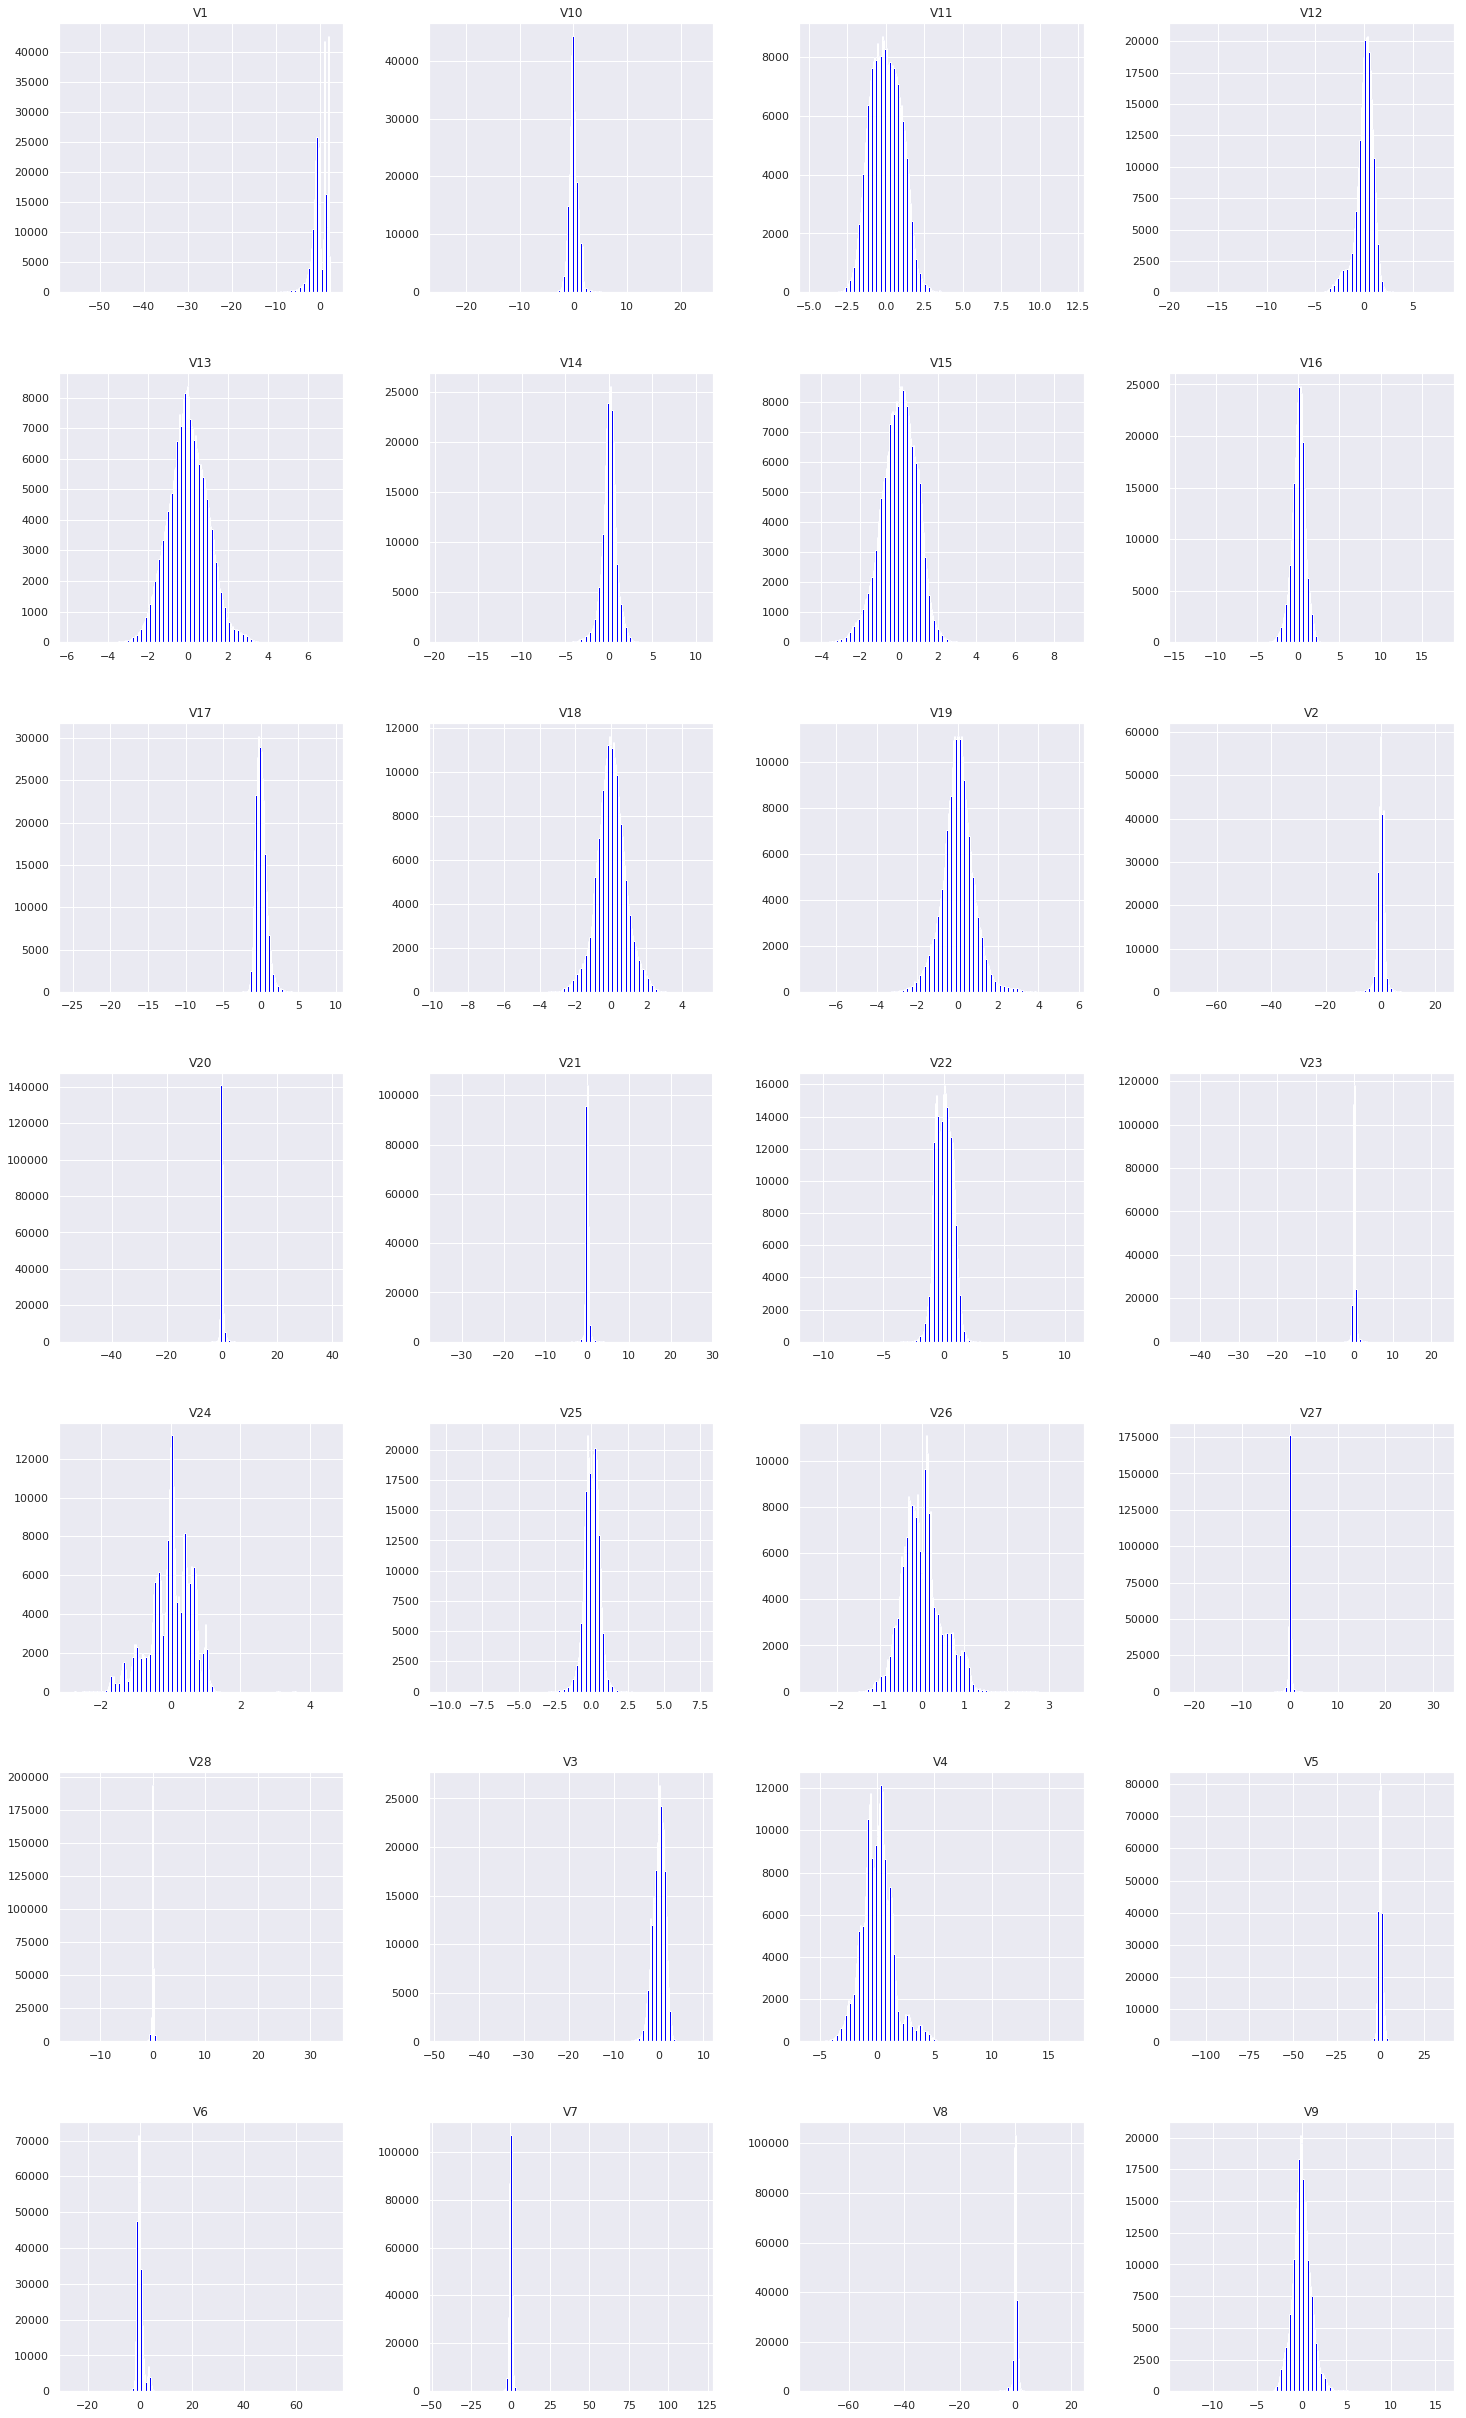

In [7]:
#Check the distribution of all the independent variables
data.drop(['Class','Amount','Time'],axis=1).hist(bins=200,color='blue',figsize=(25,50),layout=(8,4))
plt.show()

By looking at the distribution of all the features we can see that there are some features whose distributions are skewed to the left, there are some features whose distributions are skewed to the right and there are some features which appears to have a normal gaussian distribution. Almost all the features have their distributions mean at 0. Some features like V11, V15, V13, V18, V19 has a wider spread compared to other features. Some features like V6, V7, V8 and V28 have a very low spread as compared to other features. 

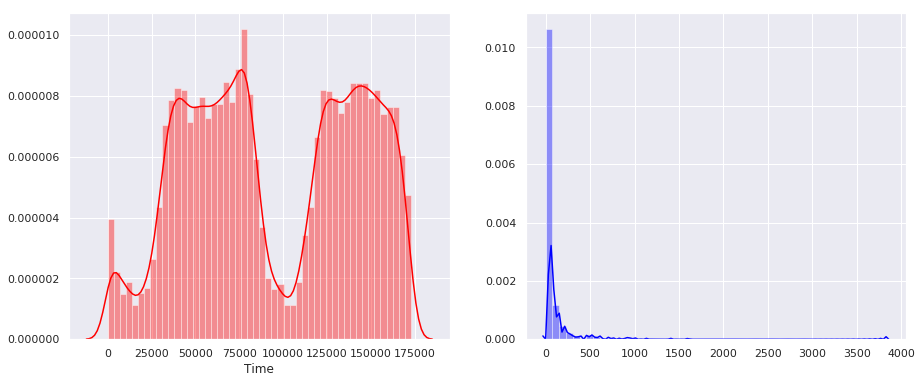

In [8]:
#Check the dsitribution of time and amount features
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sn.distplot(data['Time'],color='red')
plt.subplot(1,2,2)
sn.distplot(sorted(data['Amount'][0:1000]),color='blue')
plt.show()

On EDA of the 'Time' feature, we can see that the number of transactions falls sharply during a particular time interval. There are some regions of time where the number of transactions are very high and there some regions in time where the number of transactions are very low.

On EDA of the 'Amount' features, we see that the distribution is highly skewed towards the left. There are very small number of higher value transactions which happens in the course of 2 days.

In [34]:
#Let us get some basic information about the amount columns
print("The lowest transaction amount is: $",data['Amount'].min())
print("The highest transaction amount is: $",data['Amount'].max())
print("The median transaction amount is: $",data['Amount'].median())
print("The average transaction amount is: $",data['Amount'].mean())

print("\nThe lowest transaction amount for fraud transaction is: $",data[data.Class == 1]['Amount'].min())
print("The highest transaction amount for fraud transaction is: $",data[data.Class == 1]['Amount'].max())
print("The median transaction amount for fraud transaction is: $",data[data.Class == 1]['Amount'].median())
print("The average transaction amount for fraud transaction is: $",data[data.Class == 1]['Amount'].mean())

print("\nThe lowest transaction amount for non fraud transaction is: $",data[data.Class == 0]['Amount'].min())
print("The highest transaction amount for non fraud transaction is: $",data[data.Class == 0]['Amount'].max())
print("The median transaction amount for non fraud transaction is: $",data[data.Class == 0]['Amount'].median())
print("The average transaction amount for non fraud transaction is: $",data[data.Class == 0]['Amount'].mean())

The lowest transaction amount is: $ 0.0
The highest transaction amount is: $ 25691.16
The median transaction amount is: $ 22.0
The average transaction amount is: $ 88.34961925087359

The lowest transaction amount for fraud transaction is: $ 0.0
The highest transaction amount for fraud transaction is: $ 2125.87
The median transaction amount for fraud transaction is: $ 9.25
The average transaction amount for fraud transaction is: $ 122.21132113821133

The lowest transaction amount for non fraud transaction is: $ 0.0
The highest transaction amount for non fraud transaction is: $ 25691.16
The median transaction amount for non fraud transaction is: $ 22.0
The average transaction amount for non fraud transaction is: $ 88.29102242225574


### Exploratory data analysis.

The dataset contains 284807 transactions out of which only 492 (0.1727%) transactions are fraud. There are 28 PCA transformed features that are provided to us. These PCA features are not at all interpretable. A high level statistics of the dataset reveals that almost 50% transactions involved 22 dollars or less, almost 75% transactions involves amount less than 77 dollars. The highest transaction amount in a fraudulent scenario is 2125 dollars, whereas the highest transaction recorded in case of a non fraud scenario is 25691 dollars. The median values of all the fraudulent transactions is 9 dollars whereas the median values of all the non fraud transactions is 22 dollars.

Before proceeding to build ML models we will column standardize both the time as well amount features. In this way we can ensure that both the time and amount features are at scale with the remaining features.

In [9]:
#Colum standardize the time and amount column
from sklearn.preprocessing import StandardScaler
data["Norm_Time"]=StandardScaler().fit_transform(data['Time'].values.reshape(-1,1))
data["Norm_Amount"]=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(["Amount","Time"], axis=1)

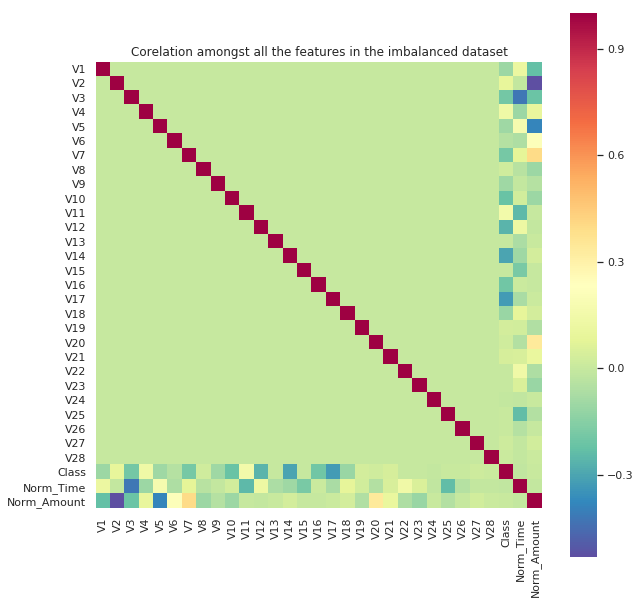

In [10]:
#Get Corelation Matrix between all the features present in the data
cor_matr = data.corr()
plt.figure(figsize=(10,10))
sn.heatmap(cor_matr,square='True',cmap='Spectral_r')
plt.title('Corelation amongst all the features in the imbalanced dataset')
plt.show()

Using seaborn we can draw corelation heatmaps which are basically same as corelation matrices. In case of a corelation heatmaps we will use color codings instead of corelation coefficient values to determine whether features have a positive or a negative corelation. A red color indicates the features have a strong positive corelation between them and a blue color indicates that two features have a strong negative corelation between themeselves. 

In [11]:
#Implement LOF for the imabalanced data set and get information about class 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score, recall_score
import gc
X=data.drop(['Class'],axis=1)
y_actual=data['Class'].values

neighbors=[10,20,30,50,70,100,150,200,300, 350, 400, 450, 500, 600]
recall_scores=[]
for n in neighbors:
    model=LocalOutlierFactor(n_neighbors=n,n_jobs=-1,contamination=fraud/total)
    y_pred = model.fit_predict(X)
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    score=recall_score(y_actual,y_pred)
    recall_scores.append(score)
    print("\nRecall scores for neighbors = {} is = {}".format(n,score))
    print("Accuracy scores for neighbors = {} is = {}".format(n,accuracy_score(y_actual,y_pred)))
    gc.collect()


Recall scores for neighbors = 10 is = 0.0
Accuracy scores for neighbors = 10 is = 0.9965450287387599

Recall scores for neighbors = 20 is = 0.0
Accuracy scores for neighbors = 20 is = 0.9965450287387599

Recall scores for neighbors = 30 is = 0.0
Accuracy scores for neighbors = 30 is = 0.9965450287387599

Recall scores for neighbors = 50 is = 0.0
Accuracy scores for neighbors = 50 is = 0.9965450287387599

Recall scores for neighbors = 70 is = 0.016260162601626018
Accuracy scores for neighbors = 70 is = 0.9966012071332516

Recall scores for neighbors = 100 is = 0.018292682926829267
Accuracy scores for neighbors = 100 is = 0.9966082294325631

Recall scores for neighbors = 150 is = 0.024390243902439025
Accuracy scores for neighbors = 150 is = 0.9966292963304975

Recall scores for neighbors = 200 is = 0.042682926829268296
Accuracy scores for neighbors = 200 is = 0.9966924970243006

Recall scores for neighbors = 300 is = 0.15040650406504066
Accuracy scores for neighbors = 300 is = 0.9970646

### Under-sample the dataset to balance the classes

Since the dataset is highly imbalanced there are broadly two strategies we will follow to correctly sample our dataset - under-sampling the dataset and over-sampling the dataset.

In this section we will use a data under-sampling technique where we will sample the data based on the number of instances we have in our minority class. In order to create the final dataset, we will take equal number of sample from both the classes, concatenate them into a single dataset and perform random shuffling to shuffle the data. The resultant dataset will contain 50% points from each of the classes.

Under-sampling helps us get rid of the problem of data imbalanced, but at the same time we are discarding huge amount of data to build our models. We can negate this by using certain data over sampling strategies. In a later section, we will implement something called SMOTE algorithm - a technique used to oversample an imbalanced dataset by adding synthetic points. We will discuss about SMOTE when we implement it.

In [11]:
state=48

In [12]:
#Number of data_fraudulent transaction in the whole data
data_fraud=data[data['Class']==1]
data_valid=data[data['Class']==0].sample(data_fraud.shape[0],random_state=state)
data_under=pd.concat([data_fraud,data_valid])

#We will shuffle our dataset after concatenating
data_under = data_under.sample(frac=1).reset_index(drop=True)
data_under.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Norm_Time,Norm_Amount
0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,-4.441484,...,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1,1.252191,5.663610
1,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,-8.372753,...,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,1,-1.424081,0.046539
2,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,-3.245109,...,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,1,-0.815276,0.330123
3,-1.824295,0.403327,-1.994122,2.756558,-3.139064,0.408185,-1.209045,1.095634,-1.447225,-3.951003,...,0.341727,0.947506,-0.145493,0.049326,0.831065,0.332421,0.252713,1,-0.582543,1.604673
4,0.667714,3.041502,-5.845112,5.967587,0.213863,-1.462923,-2.688761,0.677764,-3.447596,-4.707571,...,-0.941383,-0.006075,-0.958925,0.239298,-0.067356,0.821048,0.426175,1,1.258951,-0.326282


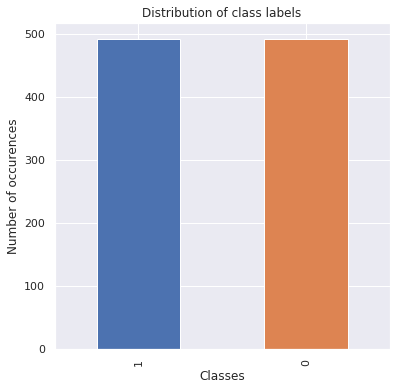

In [13]:
#Check the class distribution in the given data
data_under['Class'].value_counts().plot(figsize=(6,6),kind='bar')
plt.title("Distribution of class labels")
plt.xlabel("Classes")
plt.ylabel("Number of occurences")
plt.show()

As we can see, the distribution of class labels is almost equal after we have under-sampled the dataset. This under-sampled dataset now contains 50% class labels from the fraudulent class and 50% class labels from the non fraudulent class.

In [14]:
#Get percentage fradulent information in the balanced dataset
not_fraud=data_under[data_under['Class']==0].shape[0]
fraud=data_under[data_under['Class']==1].shape[0]
total=fraud+not_fraud

print("Percentage of Fradulent transaction: {}".format(np.round(100*fraud/total,4)))
print("Percentage of Non Fradulent transaction: {}".format(np.round(100*not_fraud/total,4)))

Percentage of Fradulent transaction: 50.0
Percentage of Non Fradulent transaction: 50.0


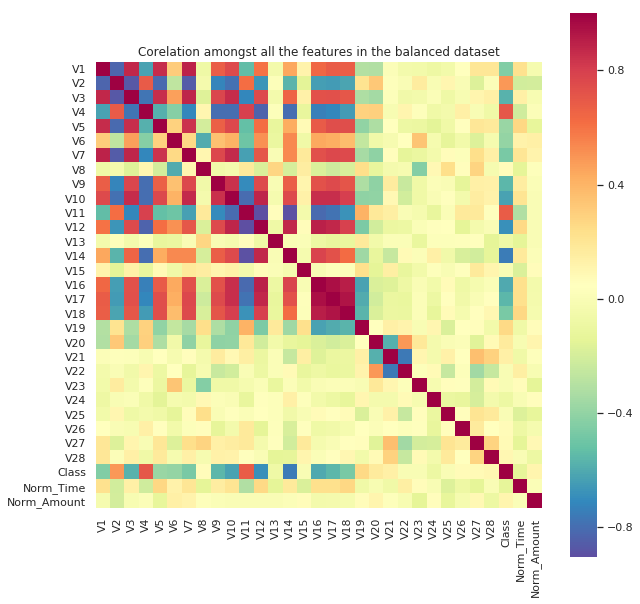

In [15]:
#Get Corelation Matrix between all the features present in the under sampled data
cor_matr = data_under.corr()
plt.figure(figsize=(10,10))
sn.heatmap(cor_matr,square='True',cmap='Spectral_r')
plt.title('Corelation amongst all the features in the balanced dataset')
plt.show()

In the corelation heatmap above, we can see that there are some features like V2, V4, V11, V19 which has a strong positive corelation to the class label. This means as the value of these features increases, there is a higher chance that a transaction will be fraudulent one.

The features V3, V10, V12, V14 and V16 seems to have a higher negative corelation to the class labels. This means as these value decreases there is a higher chance that a transaction will be a fraudulent one. 

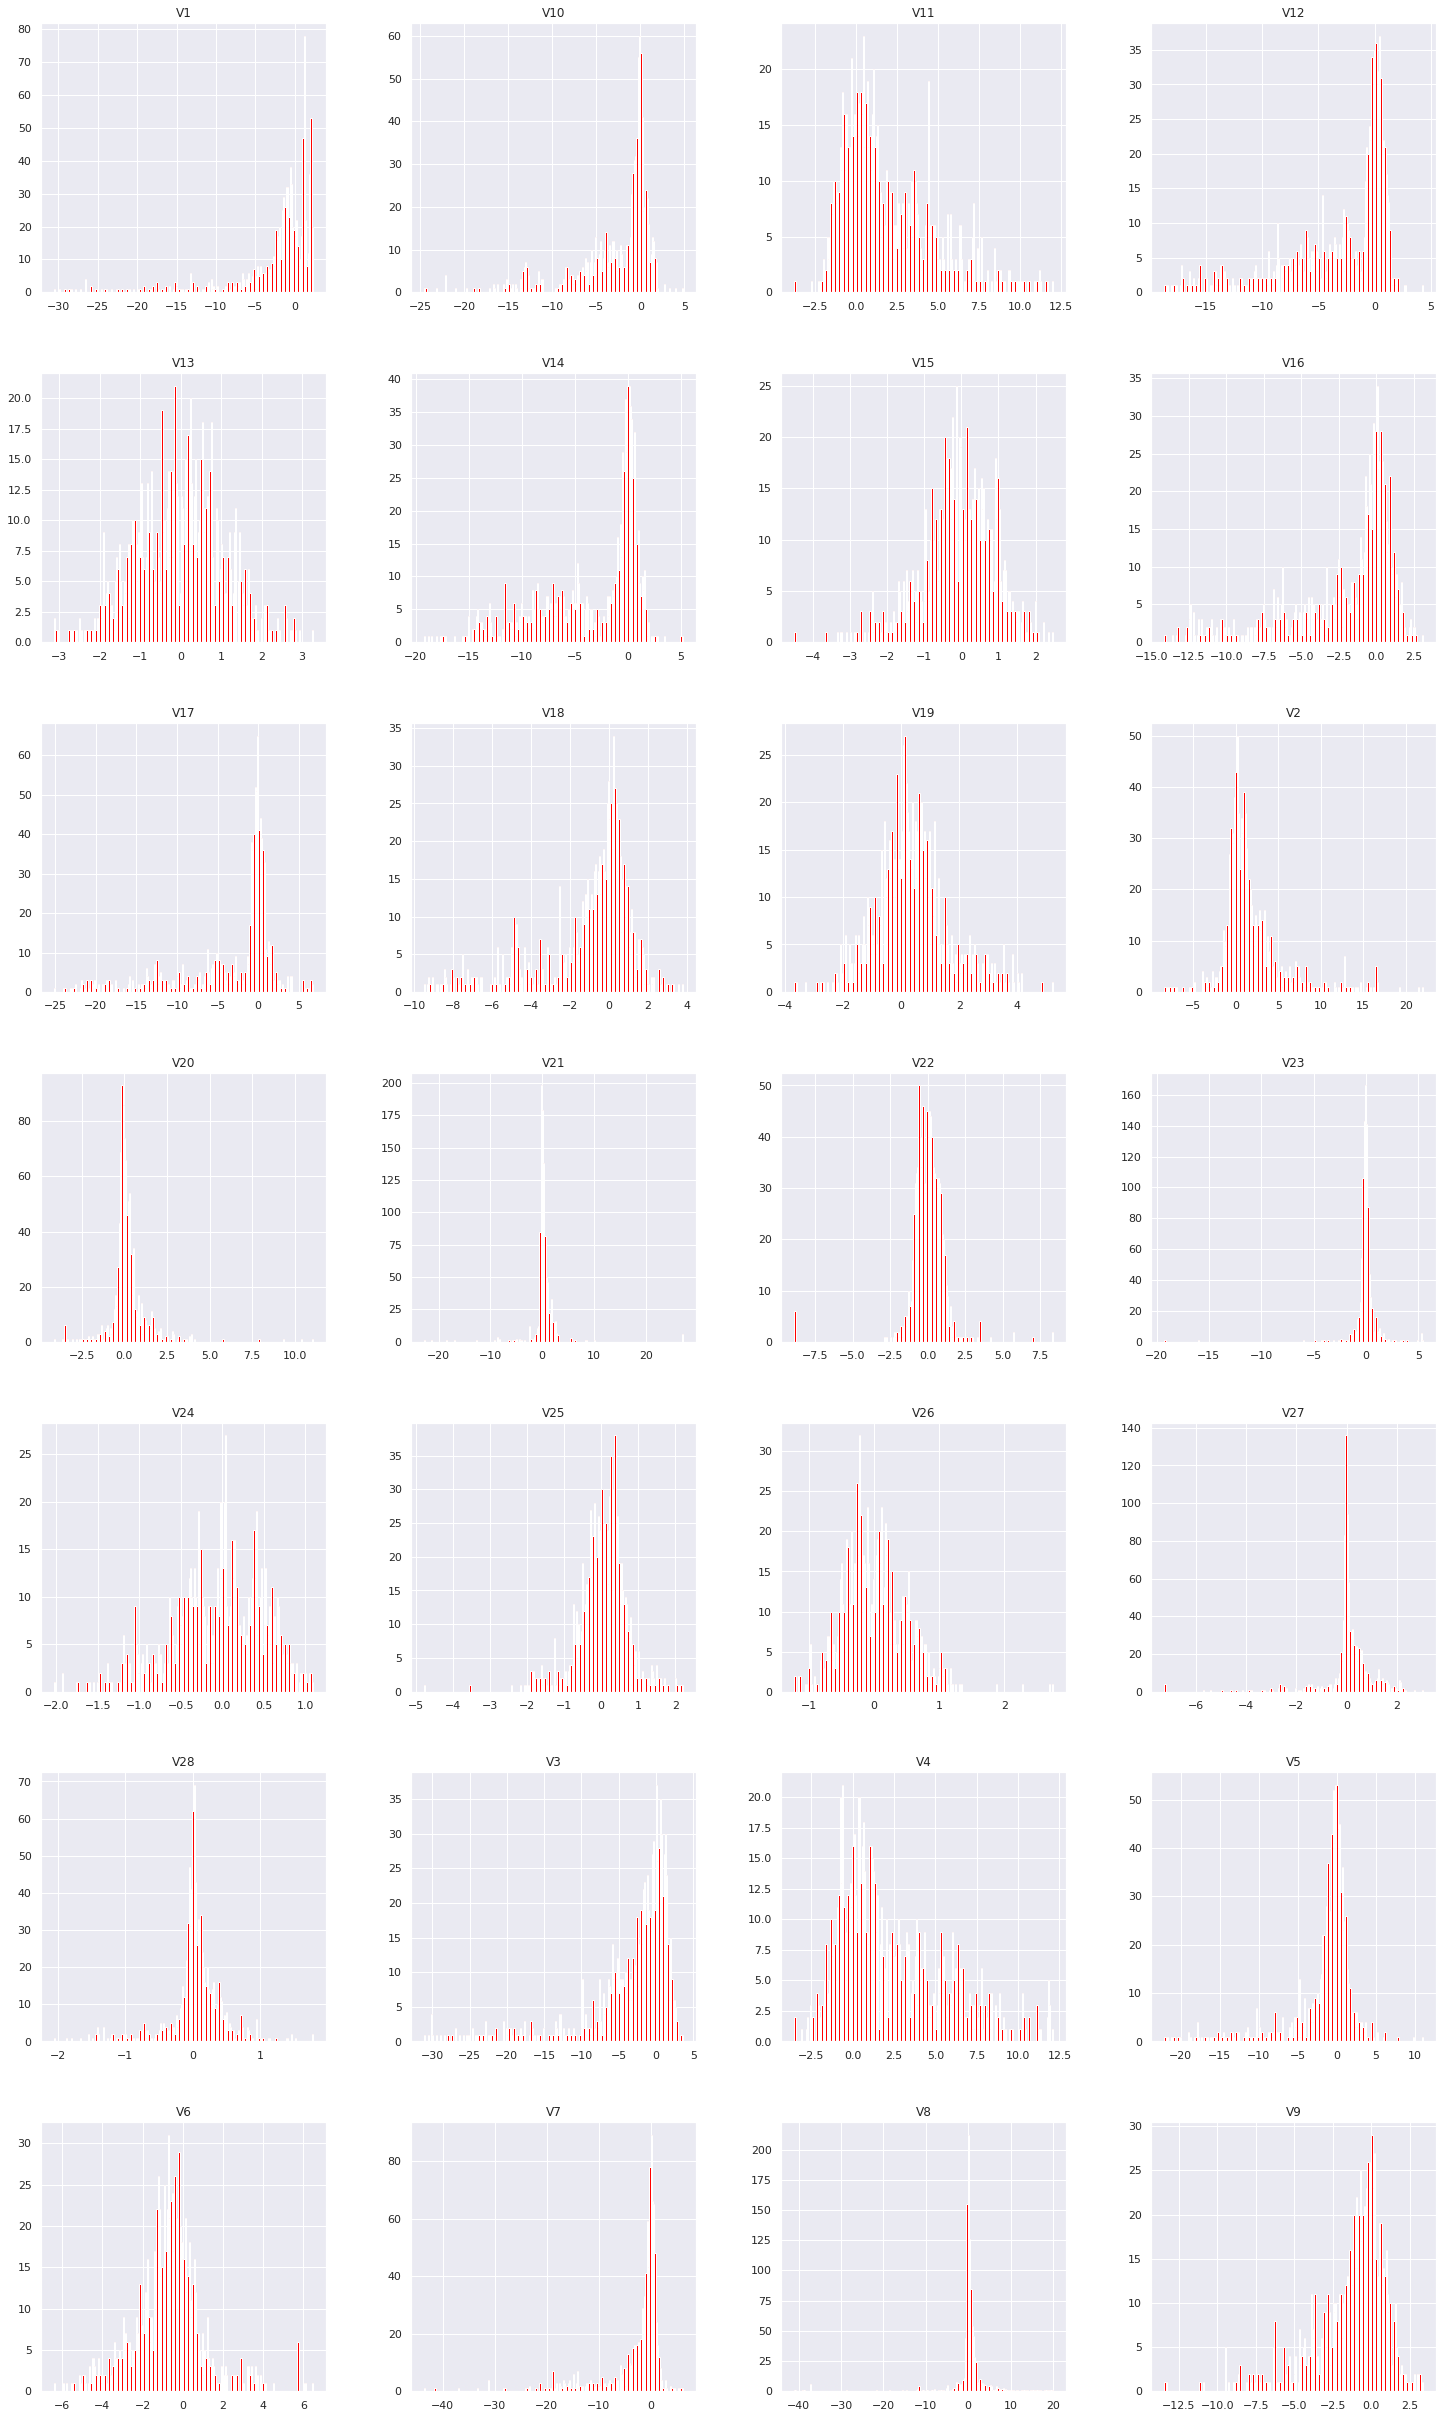

In [29]:
#Check the distribution of all the independent variables for the under sampled dataset
data_under.drop(['Class','Norm_Amount','Norm_Time'],axis=1).hist(bins=200,color='red',figsize=(25,50),layout=(8,4))
plt.show()

In [16]:
features=[i for i in data_under.drop(['Class','Norm_Amount','Norm_Time'],axis=1).columns]
len(features)

28

### Box Plots

What is a box-plot and why is it useful?

Box plot is a very powerful statistical tool which can be used to represent statistical information like median, quantiles and inter-quartile range in a single plot.

<Figure size 1008x576 with 0 Axes>

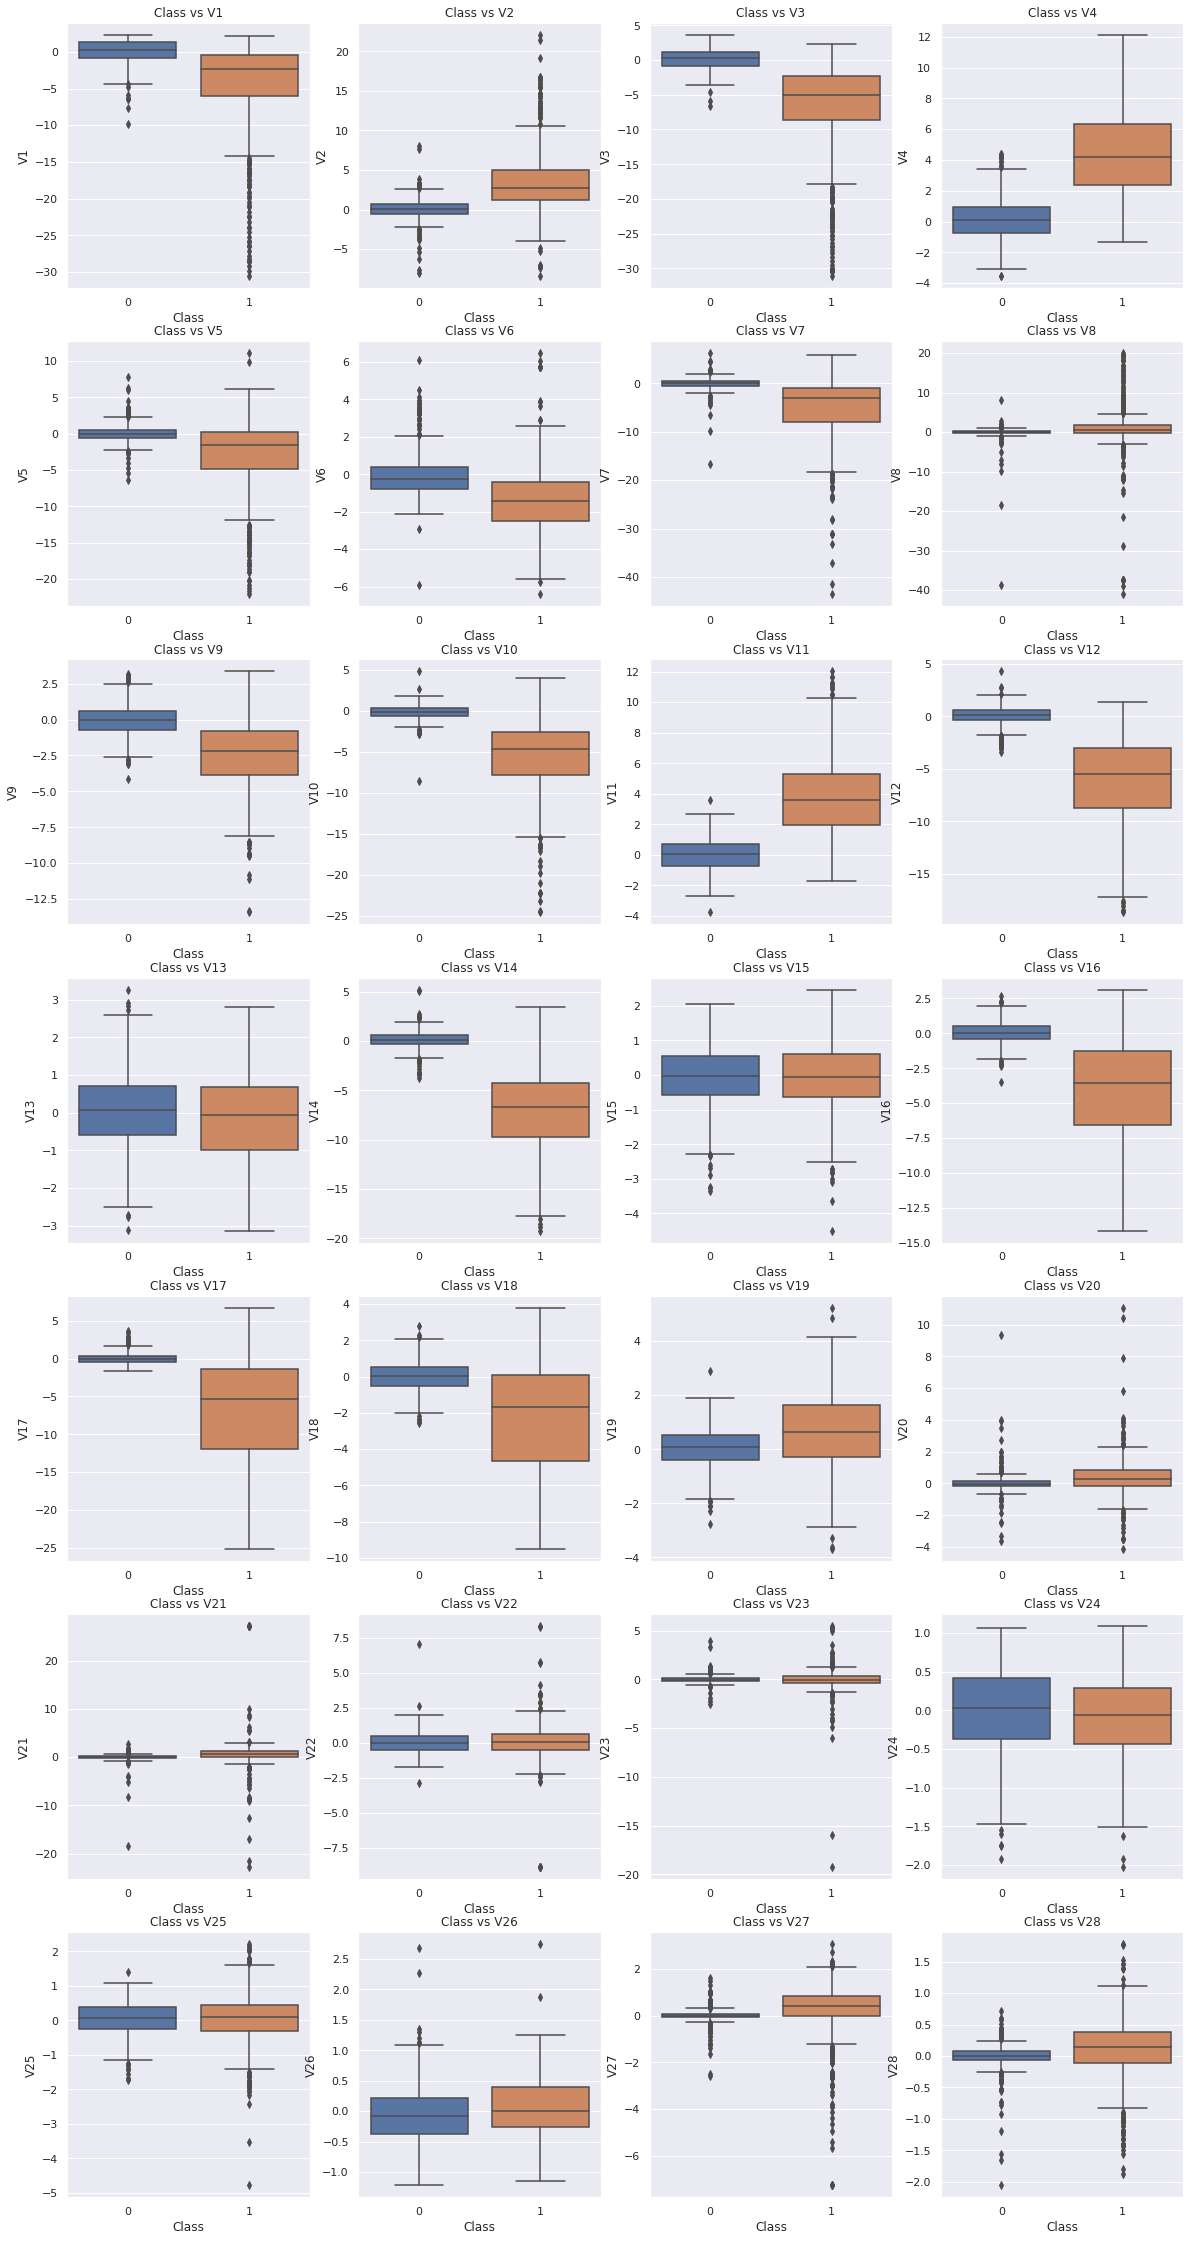

In [17]:
#Draw box plots of all the features
plt.figure(figsize=(14, 8))

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20,40))

i_ax=0
for i in range(len(features[0:4])):
    sn.boxplot(x="Class", y=features[i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[i]))
    
i_ax=1
for i in range(len(features[4:8])):
    sn.boxplot(x="Class", y=features[4+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[4+i]))
    
i_ax=2
for i in range(len(features[8:12])):
    sn.boxplot(x="Class", y=features[8+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[8+i]))
    
i_ax=3
for i in range(len(features[12:16])):
    sn.boxplot(x="Class", y=features[12+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[12+i]))
    
i_ax=4
for i in range(len(features[16:20])):
    sn.boxplot(x="Class", y=features[16+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[16+i]))
    
i_ax=5
for i in range(len(features[20:24])):
    sn.boxplot(x="Class", y=features[20+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[20+i]))
    
i_ax=6
for i in range(len(features[24:28])):
    sn.boxplot(x="Class", y=features[24+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[24+i]))
    
i_ax=7
for i in range(len(features[28:32])):
    sn.boxplot(x="Class", y=features[28+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[28+i]))
    
plt.show()

### PDF Distribution

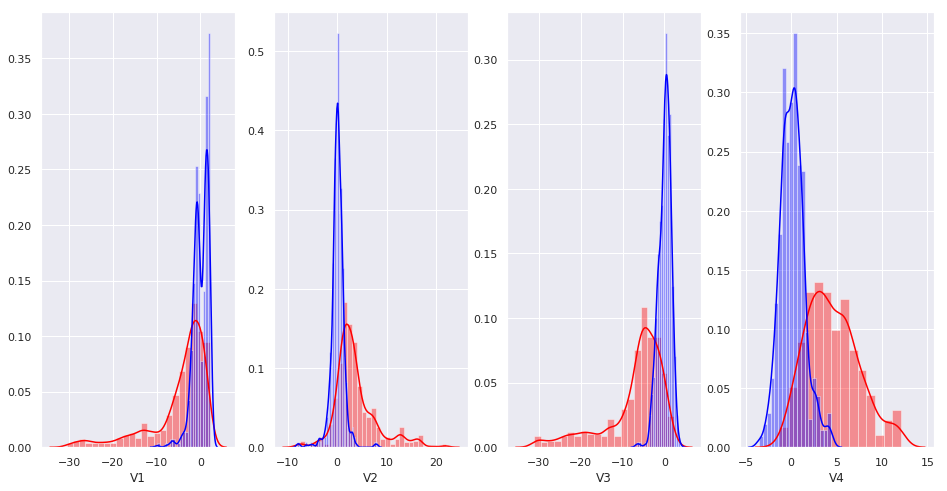

In [18]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V1'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V1'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V2'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V2'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V3'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V3'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V4'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V4'][0:] , label = "0" , color = 'blue' )

plt.show()

Here we can see that for features V1, V2, V3 and V4 the class distributions are partially separable. All the distributions are highly skewed. For V4, there is more partial separatability as compared to the other features. 

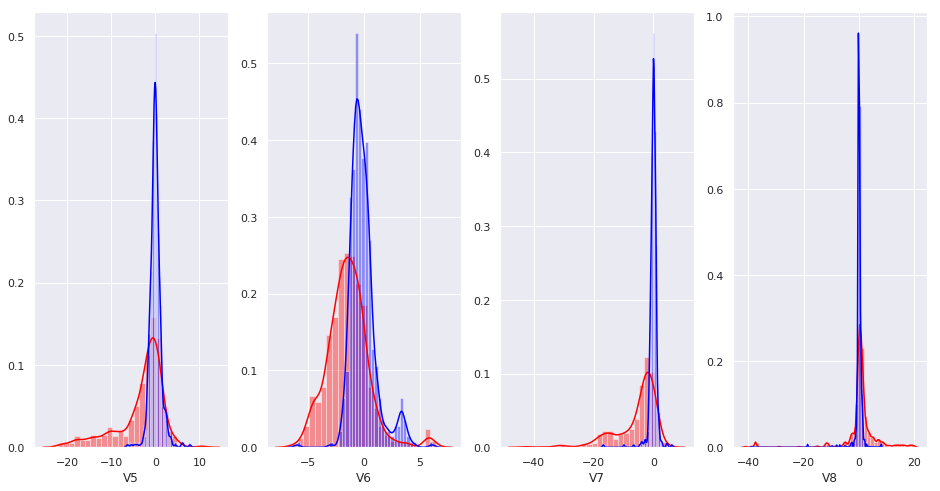

In [19]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V5'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V5'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V6'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V6'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V7'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V7'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V8'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V8'][0:] , label = "0" , color = 'blue' )

plt.show()

For V5 and V6, the class distributions are partially separable. For V7 and V8 the class distributions are almost overlapping and there is no clear way of separating these features based on their class labels.

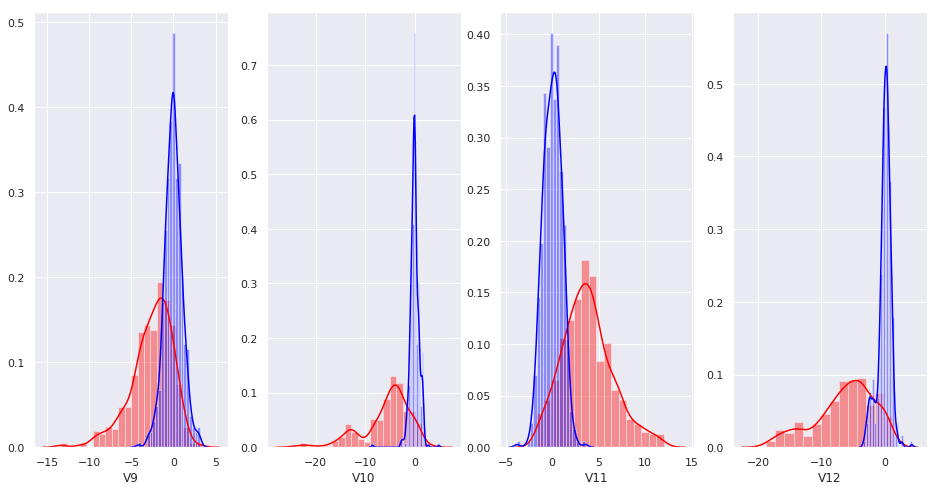

In [20]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V9'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V9'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V10'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V10'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V11'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V11'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V12'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V12'][0:] , label = "0" , color = 'blue' )

plt.show()

Here again, we see a lot of partial separability between the class labels for all four of these features.  

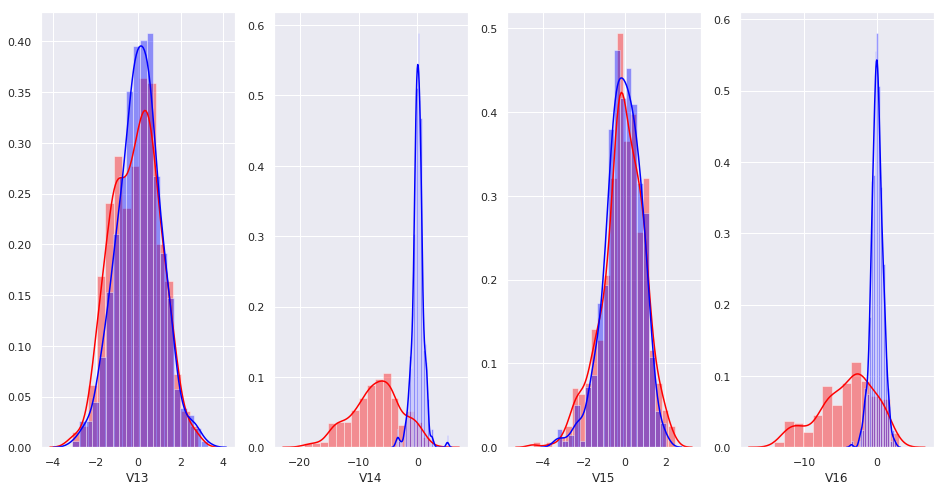

In [21]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V13'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V13'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V14'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V14'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V15'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V15'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V16'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V16'][0:] , label = "0" , color = 'blue' )

plt.show()

V13, V15 features are highly overlapping as far as their class label is concerned. V14 and V16 features has some partial separability as far as their class label is concerned. 

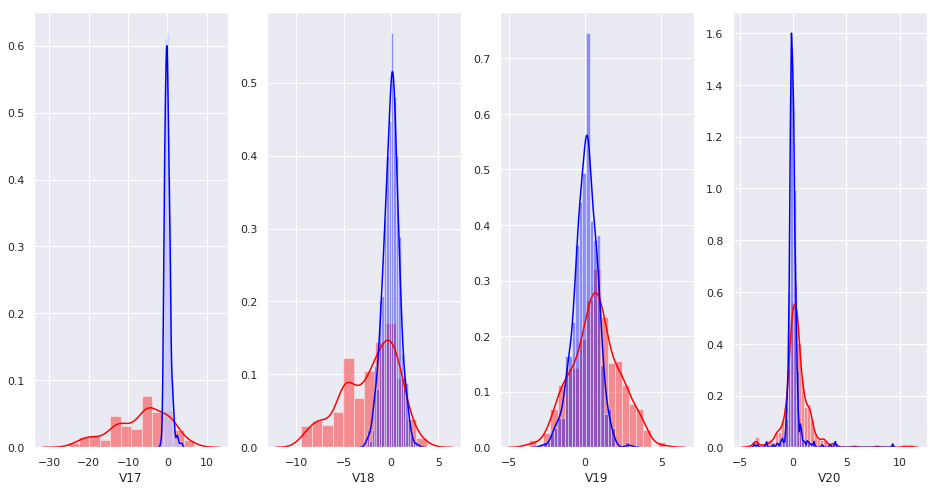

In [22]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V17'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V17'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V18'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V18'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V19'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V19'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V20'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V20'][0:] , label = "0" , color = 'blue' )

plt.show()

Here the spread of the fraudulent class is more as compared to the spread in non fraudulent class.

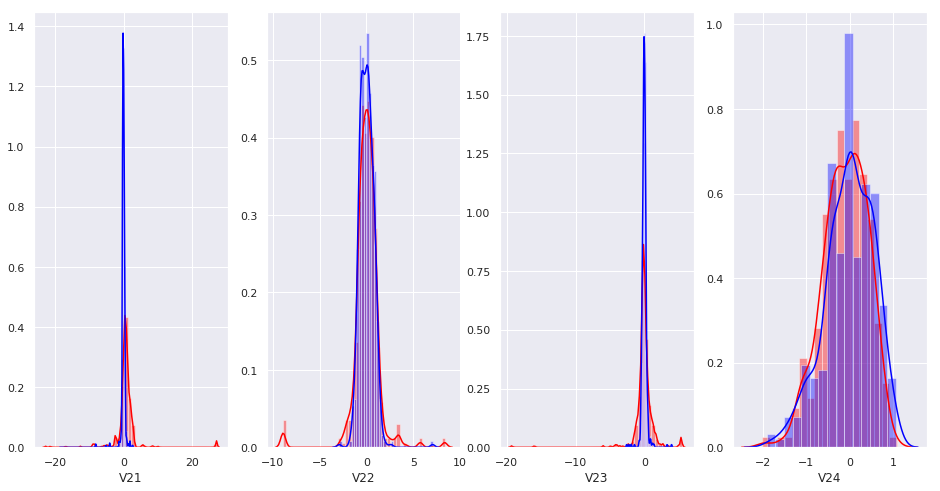

In [23]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V21'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V21'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V22'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V22'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V23'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V23'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V24'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V24'][0:] , label = "0" , color = 'blue' )

plt.show()

The class distribution of these features - V21, V22, V23 and V24 are completely inseparable. The distributions are highly overlapping with no way to separate the class labels.

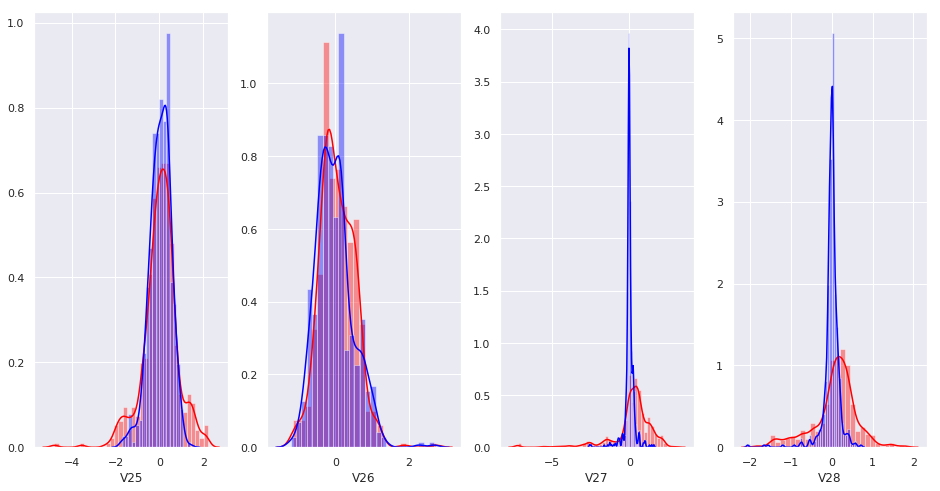

In [24]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V25'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V25'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V26'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V26'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V27'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V27'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V28'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V28'][0:] , label = "0" , color = 'blue' )

plt.show()

Here again we see that these features cannot be separated well based on their class labels. The class distributions are highly overlapping.

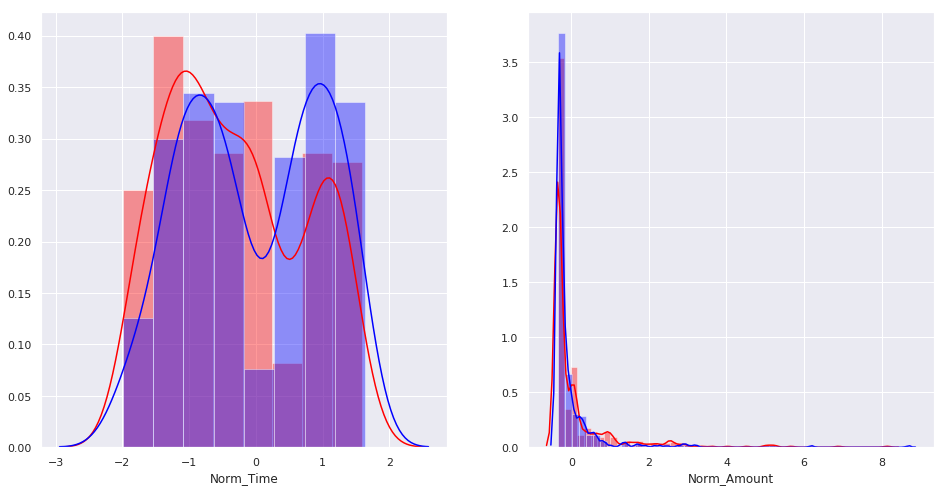

In [25]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
sn.distplot(data_under[data_under['Class'] == 1]['Norm_Time'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['Norm_Time'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,2,2)
sn.distplot(data_under[data_under['Class'] == 1]['Norm_Amount'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['Norm_Amount'][0:] , label = "0" , color = 'blue' )


plt.show()

### Splitting the data into train and test datasets

Before building our machine learning models, we will split the dataset in such a way that 80% of the undersample data goes to our training set and 20% data from the undersampled class goes to our test set. We will make use of the 'stratify' argument to make sure we have equal distribution of class labels in both the training as well as test sets. 

After the initial splitting, we have 787 points in our training dataset and 197 points in our test dataset. We will build machine learning models using these 787 points and then evaluate the performance of each of our models on the test set. 

In [26]:
from sklearn.model_selection import train_test_split

X=data_under.drop("Class", axis=1)
y=data_under['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=state)

print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Number of data points in train data: 787
Number of data points in test data: 197


### Check the distribution of train and test data after splitting the original dataset

This is a sanity check we need to perform to check if the distribution of class labels is same in both the training as well as the test set. We can see that in both the train as well as the test sets, the class labels are distributed almost equally at 50% data points from each of the classes.

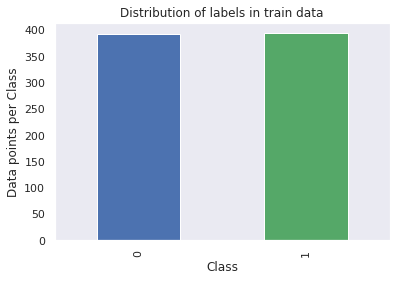

Number of data points in class 2 : 394 ( 50.064 %)
Number of data points in class 1 : 393 ( 49.936 %)
--------------------------------------------------------------------------------


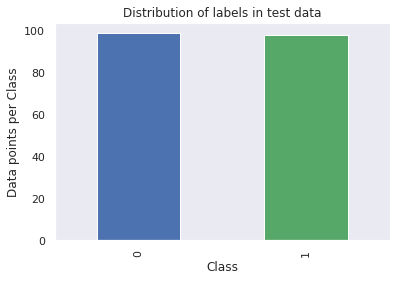

Number of data points in class 1 : 99 ( 50.254 %)
Number of data points in class 2 : 98 ( 49.746 %)


In [27]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()

my_colors = ["b","g"]
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of labels in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')
    
print('-'*80)
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of labels in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

### Dimensionality Reduction using PCA

Shape of the Data Matrix before reducing dimension:  (787, 30)
Shape of the Data Matrix after reducing dimension:  (787, 2)


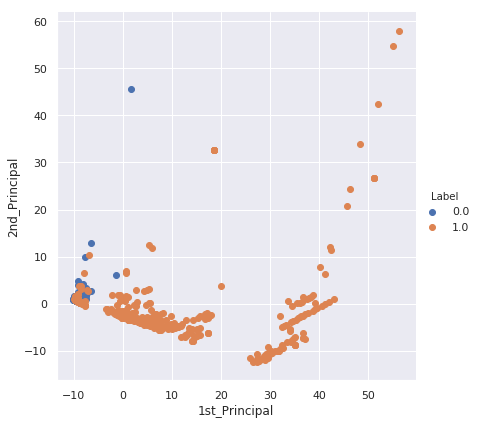

In [44]:
#Initialize the PCA
from sklearn import decomposition
pca = decomposition.PCA()

#Configure the parameteres: Number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train)

#pca_data will contain the 2-D projections of X_train
print("Shape of the Data Matrix before reducing dimension: ",X_train.shape)
print("Shape of the Data Matrix after reducing dimension: ",pca_data.shape)

#Attaching the label for each 2D data point. 
pca_data = np.vstack((pca_data.T, y_train)).T

#Creating a new dataframe which help us in ploting the result data. The new dataframe contains the reduced dimension of X_train along with the class label.
pca_df = pd.DataFrame(data=pca_data, columns=("1st_Principal", "2nd_Principal", "Label"))
sn.FacetGrid(pca_df, hue="Label", size=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

### Function to plot Confusion Matrix, Precision Matrix, Recall Matrix

We will use this function to draw the confusion matrix, precision matrix and the recall matrix. We will use the confusion matrix to keep an eye on the false positive values and the recall values. Our main objective of this case study is to build a model which has a high recall value.

Confusion Matrix is a tool which helps us to evaluate the performance of our classification model on unseen data. It's a very important tool to evaluate metrics such as Precision, Recall, Accuracy and Area under the ROC curve using these four values - False Positives (FP), False Negatives (FN), True Positives (TP) and True Negatives (TN).

Let us understand these four metrics in a bit more detail with regards to the given problem. 

True Positives (TP): Here the model has predicted the transaction to be fraudulent and in real life the transaction is fraudulent.

True Negatives (TN): Here the model has predicted a transaction to be a non-fraudulent one and in real life the transaction is non-fraudulent. 

False Positives (FP): Here the model has predicted the transactions to be fraudulent whereas in real life the given transaction is not fraudulent. These are also known as Type 1 errors.

False Negatives (FN): Here the model has predicted the transactions to be non-fraudulent where as in real life the transactions are fraudulent. These are also known as Type 2 errors.

Ideally, for a perfect model, we would want the values of TPs and TNs to be very high and our FPs and FNs to be very low. Also, for this problem it's an absolute necessity to keep the False Negative values as low as possible. In the real world Type 2 errors are much more sever than Type 1 errors. Imagine this scenario - our model predicts a fraudulent transaction as a non fraudulent one. This is much more severe than predicting a non-fraudulent transaction as a fraudulent one.

Recall tells us that out of the total number of actual/correctly classified classes how many did our model predicted to belong to the correctly classified class?

Precision tells us that out of the total number of predictions how many of them are actually predicted to be true?

In [12]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sn.light_palette("blue")
    plt.subplot(1, 3, 1)
    sn.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sn.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sn.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

### Function to plot the ROC-AUC Curve

ROC curve stands for Receiver operating characteristic curve. In machine learning, ROC curves helps us evaluate our models performance at various threshold settings. ROC curves is a probability curve and AUC stands for the area under the ROC curve. Generally a ROC-AUC curves gives us an idea about how well our model is capable of distinguishing between various class labels. IN ROC-AUC curve, the value of the true positive rates and false positive rates are plotted against each other at various threshold settings. Higher the value of an ROC-AUC curve, the better will be our model in predicting a class 0 label as class 0 and class 1 label as class 1. For this case study, class 1 signifies a fraudulent transaction and class 0 signifies a non-fraudulent transaction. 

While plotting the ROC-AUC curve, the TPR is taken in Y-Axis and the FPR is taken at X-axis. TPR is also known ans Recall. Mathematically TPR is defined as (TP/TP+FN), and FPR is defined as (FP/TN+FP). We will have to optimize our Machine Learning models such that they maximize the ROC-AUC score.

In [13]:
#This function is used to plot the ROC curve on both train and test.
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(classifier, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    '''TEST DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])
    
    '''TRAIN DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_train)
    y_probs = class_probabilities[:,1]
    fpr["Train"], tpr["Train"], threshold = roc_curve(y_train, y_probs)
    roc_auc["Train"] = auc(fpr["Train"], tpr["Train"])
    
    plt.figure(figsize=(15,10))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
    plt.plot(fpr["Train"], tpr["Train"], color='red', lw=linewidth, label='ROC curve Train Data (area = %0.2f)' % roc_auc["Train"])
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Generic function to run any model and print the classification metrics

This function is used to evaluate our model on unseen data. We will first obtain the best estimator using either grid search or random search. We will use the best estimator from our model to print the roc-auc scores, the accuracy scores, the recall score and the f1 score. F1 score as we know is the harmonic mean between precision and recall scores. We will also use this function to generate the classification report for each of our models. 

In [14]:
def model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels):
    
    #To store results at various phases during training as well as cross validation stages
    results = dict()
    model = rsearch_cv.best_estimator_
    
    #Time at which model starts training 
    train_start_time = dt.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    print('Training completed... \n \n')
    train_end_time = dt.now()
    results['Training_Time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) -- {}\n\n'.format(results['Training_Time']))
    
    
    #Predict the test data
    print('Predicting test data...')
    test_start_time = dt.now()
    y_pred = model.predict(X_test)
    test_end_time = dt.now()
    print('Predicting test data completed... \n \n')
    results['Testing_Time'] = test_end_time - test_start_time
    print('Testing Time(HH:MM:SS:ms) -- {}\n\n'.format(results['Testing_Time']))
    results['Predicted'] = y_pred
   

    #Compute the F1 score 
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
    
    #Store F1 Score in results
    results['F1_Score'] = f1_score
    print('---------------------')
    print('|      F1 Score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score))      
    

    #Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    #Calculate overall recall_score of the model
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Recall'] = recall
    print('---------------------')
    print('|      Recall        |')
    print('---------------------')
    print('\n    {}\n\n'.format(recall))
    
    #Calculate overall roc-auc of the model
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    class_probabilities = sig_clf.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_probs)
        
    #Store the ROC-AUC in results
    results['ROC-AUC'] = roc_auc
    print('---------------------')
    print('|      ROC AUC       |')
    print('---------------------')
    print('\n    {}\n\n'.format(roc_auc))   
                   
    #Display the classification report having individual class recalls and precision values.
    print('-------------------------')
    print('| Classifiction Report  |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    #Store report in results
    results['Classification_Report'] = classification_report
    print(classification_report)
    
    #Add the trained  model to the results
    results['Model'] = model
    
    #Plot the confusion matrix curve
    plot_confusion_matrix(y_test, y_pred)
    
    return results, model

### Generic function to print grid/random search results/attributes

This function will be used to print the best estimator obtained using grid search/random search. For each estimator, we will print the best parameters for a given function along with their best scores on the cross validation dataset.

In [15]:
def print_grid_search_attributes(model):
    #Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    #Parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    #Number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    #Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

## Machine Learning Models

### 1. Logistic Regression Classifier

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from datetime import datetime as dt

st=dt.now()

tuned_parameters = {'C': np.logspace(-4,3,50),
                     'penalty': ['l1','l2'] } #C values used for cross validation

model = LogisticRegression(n_jobs=-1, random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    1.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.9s finished


Time taken to complete random search:  0:00:01.904716


In [33]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.0003727593720314938, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=48,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'penalty': 'l2', 'C': 0.0003727593720314938}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9767022877249171



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.008919


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.001629


---------------------
|      F1 Score      |
---------------------

    0.8883248730964467


---------------------
|      Accuracy      |
---------------------

    0.8883248730964467


---------------------
|      Recall        |
---------------------

    0.9795918367346939


---------------------
|      ROC AUC       |
---------------------

    0.9886621315192744


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        99
           1       0.83      0.98      0.90        98

   micro avg       0.89      0.89      0.89       197
   macro avg       0.90      0.89      0.89       197
weighted avg       0.90      0.89      0.89       197



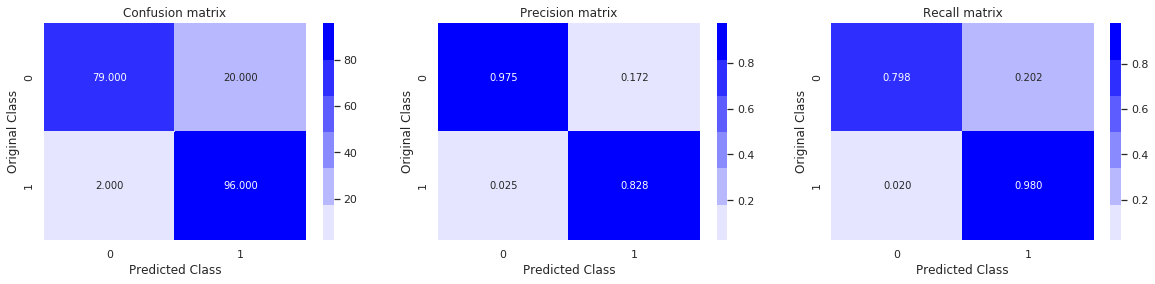

In [37]:
log_reg_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

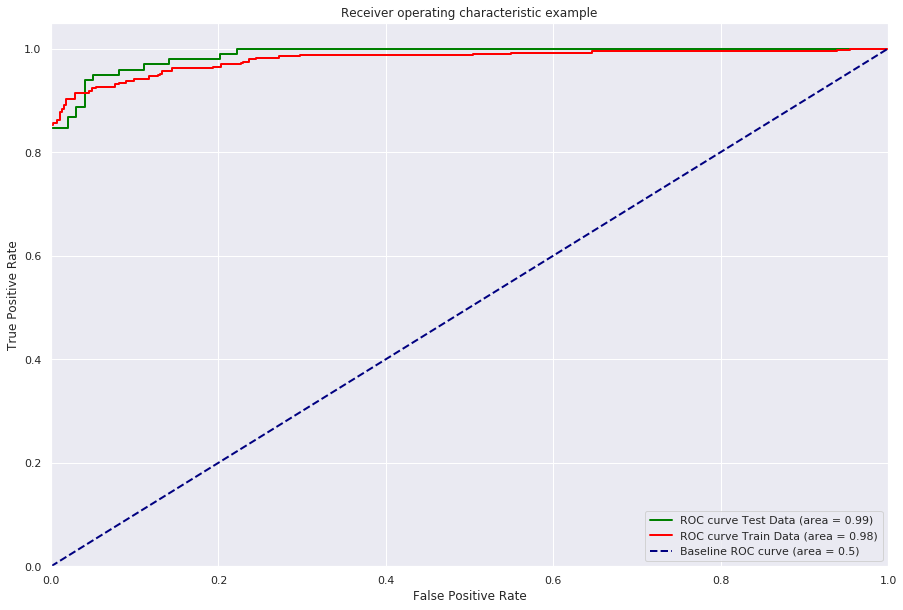

In [38]:
#Calibrate the model
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 2. KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

st=dt.now()

tuned_parameters = {'n_neighbors': [3,5,7,9,11,13,15],
                    'weights': ['uniform','distance'],
                    'algorithm': ['ball_tree','kd_tree','brute'] }

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)

rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    0.8s remaining:    0.3s


Time taken to complete random search:  0:00:01.003091


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


In [40]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
           weights='distance')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'distance', 'n_neighbors': 13, 'algorithm': 'kd_tree'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9755376739939822



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.003352


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.107235


---------------------
|      F1 Score      |
---------------------

    0.9289340101522843


---------------------
|      Accuracy      |
---------------------

    0.9289340101522843


---------------------
|      Recall        |
---------------------

    0.8775510204081632


---------------------
|      ROC AUC       |
---------------------

    0.985312306740878


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

   micro avg       0.93      0.93      0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



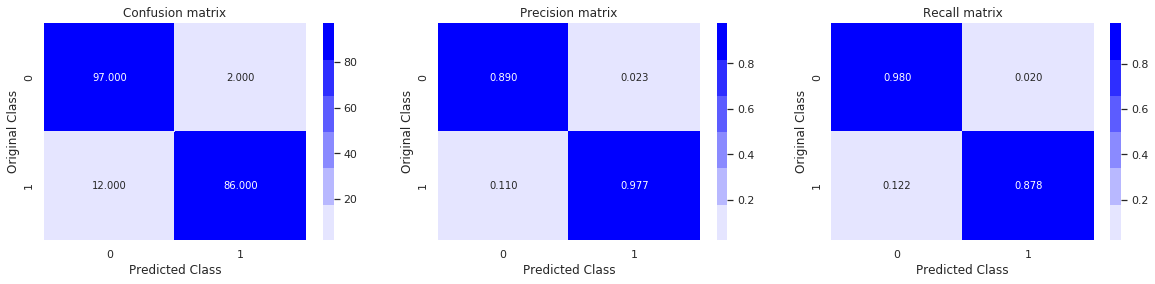

In [41]:
knn_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

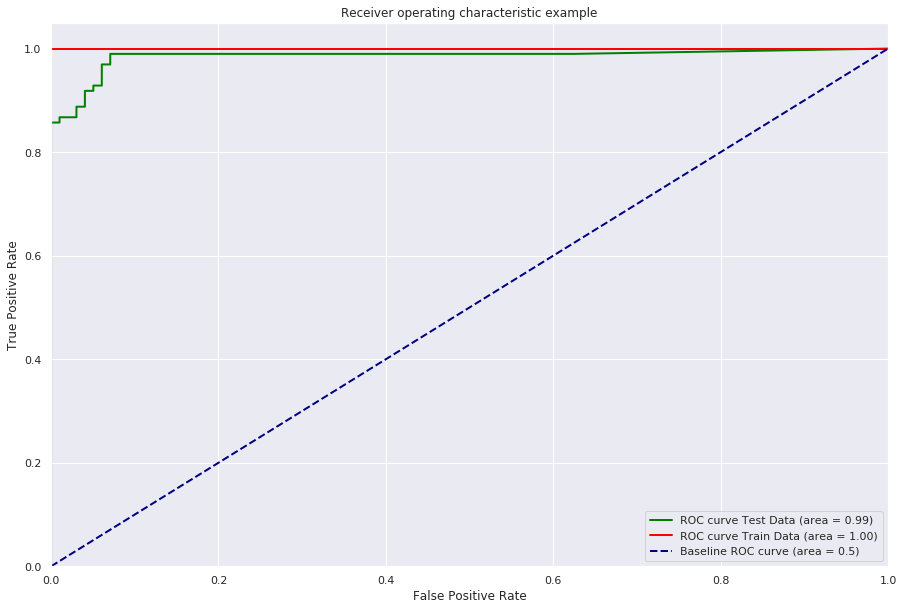

In [42]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 3. Decision Trees Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier


st=dt.now()

tuned_parameters = {'max_depth': np.arange(1,10,1),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                    'max_features': ['auto','sqrt','log2']} 

model = DecisionTreeClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)

rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Time taken to complete random search:  0:00:00.181862


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of  30 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [44]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=0.1,
            min_weight_fraction_leaf=0.1, presort=False, random_state=48,
            splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.1, 'min_samples_split': 0.1, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9402813428718644



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.003679


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.001357


---------------------
|      F1 Score      |
---------------------

    0.8984771573604061


---------------------
|      Accuracy      |
---------------------

    0.8984771573604061


---------------------
|      Recall        |
---------------------

    0.8163265306122449


---------------------
|      ROC AUC       |
---------------------

    0.9444959802102658


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        99
           1       0.98      0.82      0.89        98

   micro avg       0.90      0.90      0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197



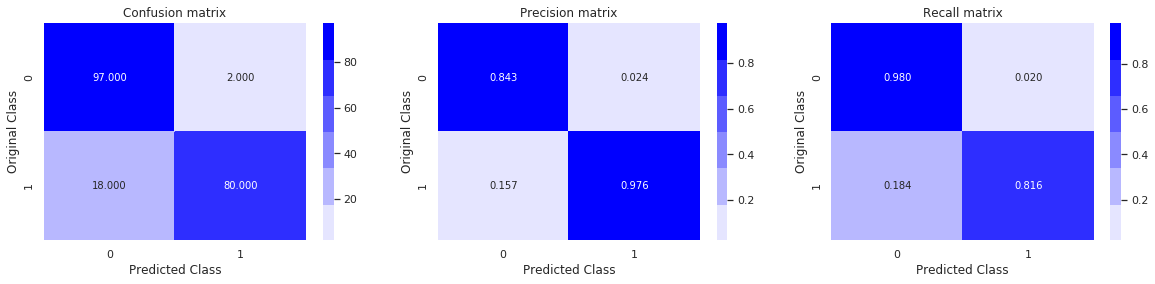

In [45]:
dt_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

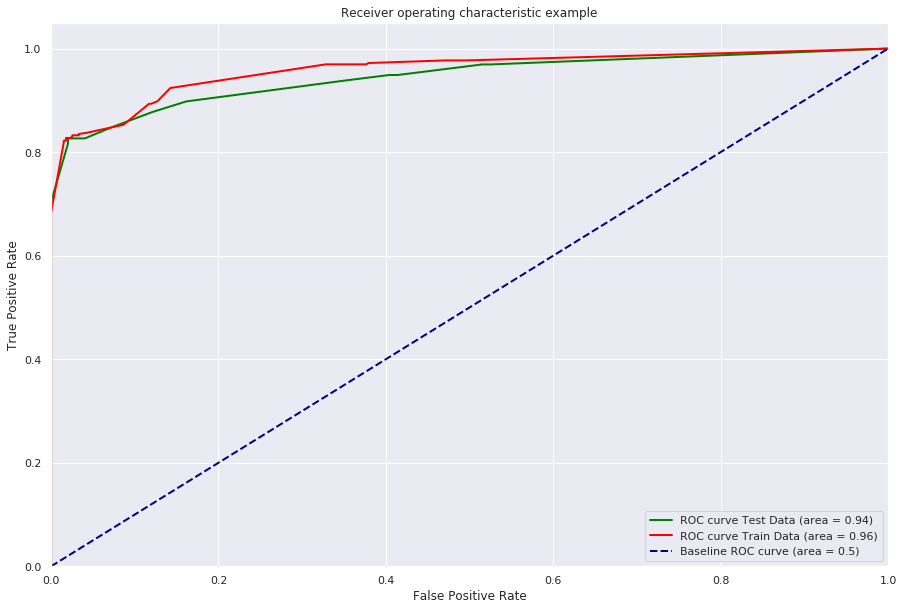

In [46]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

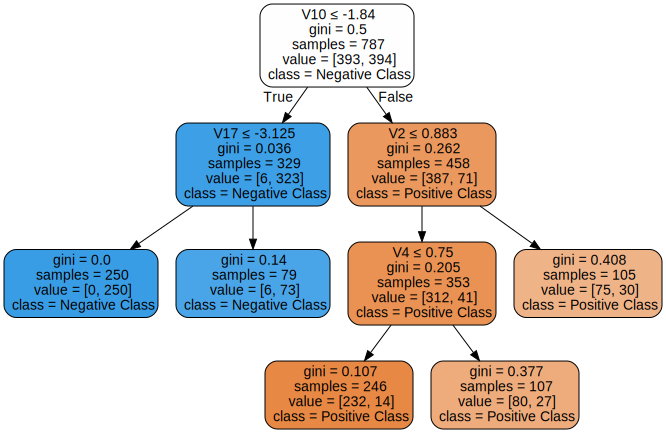

In [47]:
#https://scikit-learn.org/stable/modules/tree.html
def visualize_tree(trained_clf, f_names, filename):
    from sklearn import tree
    import graphviz
    dot_data = tree.export_graphviz(decision_tree=trained_clf, out_file=None, max_depth=3, filled=True, rounded=True, special_characters=True, impurity=True, feature_names=f_names, class_names=['Positive Class','Negative Class'])  
    graph = graphviz.Source(dot_data)  
    graph.render(filename, format='png') 
    return graph

#Call the function above and pass a filename onto it.
f_names=[i for i in X_train.columns]

graph=visualize_tree(trained_model, f_names, 'Credit_Card_Tree.png')
graph

### 4. Linear SVM Classifier

In [48]:
from sklearn.svm import SVC

st=dt.now()
tuned_parameters = {'C':np.logspace(-3,4,25), 
                    'gamma':np.logspace(-3,1,8)}

model = SVC(random_state=state)

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s


Time taken to complete random search:  0:00:00.425082


[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished


In [49]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=0.028729848333536655, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.003727593720314938,
  kernel='rbf', max_iter=-1, probability=False, random_state=48,
  shrinking=True, tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'gamma': 0.003727593720314938, 'C': 0.028729848333536655}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9706541441848967



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:00.038415


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.007886


---------------------
|      F1 Score      |
---------------------

    0.9187817258883249


---------------------
|      Accuracy      |
---------------------

    0.9187817258883249


---------------------
|      Recall        |
---------------------

    0.8469387755102041


---------------------
|      ROC AUC       |
---------------------

    0.9855699855699855


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        99
           1       0.99      0.85      0.91        98

   micro avg       0.92      0.92      0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



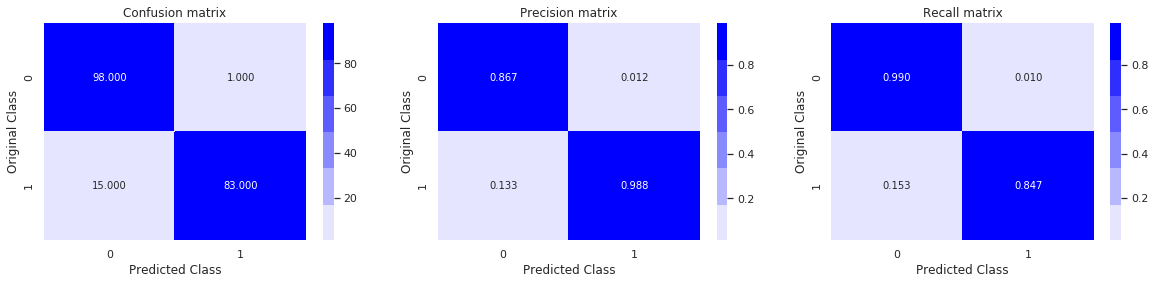

In [50]:
svc_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

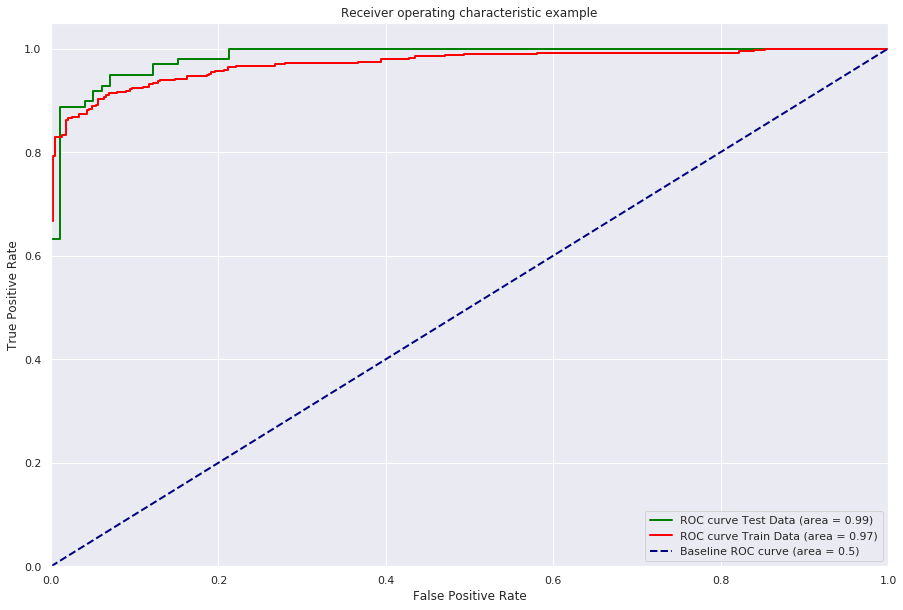

In [51]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 5. Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,1000,1500,2000,3000],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    8.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.6s finished


Time taken to complete random search:  0:00:15.309435


In [53]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
            oob_score=False, random_state=48, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 1500, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
------------------------

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:04.717364


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.157480


---------------------
|      F1 Score      |
---------------------

    0.934010152284264


---------------------
|      Accuracy      |
---------------------

    0.934010152284264


---------------------
|      Recall        |
---------------------

    0.8877551020408163


---------------------
|      ROC AUC       |
---------------------

    0.9860853432282004


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

   micro avg       0.93      0.93      0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



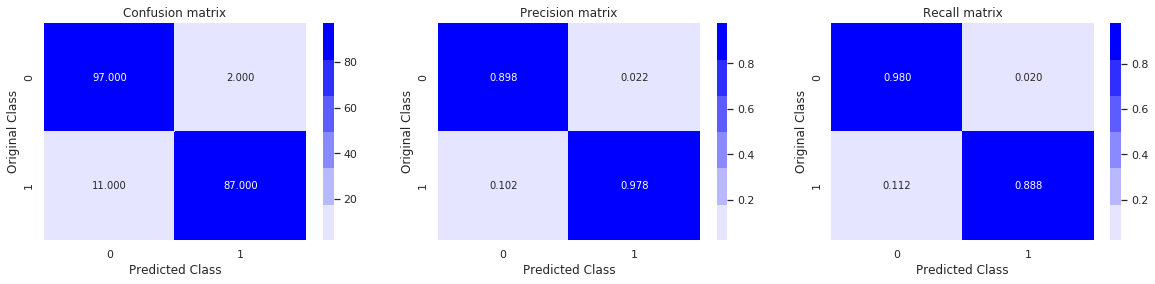

In [54]:
rf_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

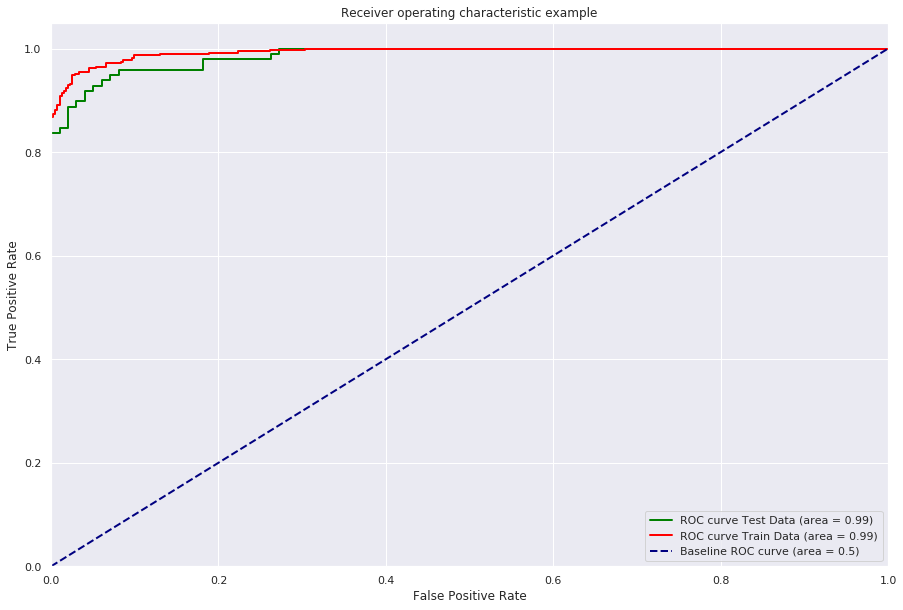

In [55]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 6. XGBoost Classifier

In [59]:
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01,0.001,0.0001],
                    'n_estimators':[10,25,50,100,250,500,650,750,850,1000,1500,2000,3000],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7,9],
                    'max_depth': [3,4,5,6,7,9,11,13,15,17,20,25,50],
                    'colsample_bytree':[0.6,0.7,0.8],
                    'gamma':[0,0.25,0.4,0.5,0.55,0.7,1]}

model = XGBClassifier(random_state=state)

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    1.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.2s finished


Time taken to complete random search:  0:00:04.625647


In [60]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.25, learning_rate=0.01,
       max_delta_step=0, max_depth=17, min_child_weight=3, missing=None,
       n_estimators=850, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=48, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.6)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.6, 'n_estimators': 850, 'min_child_weight': 3, 'max_depth': 17, 'learning_rate': 0.01, 'gamma': 0.25, 'colsample_bytree': 0.8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Valid

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:01.452918


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.009262


---------------------
|      F1 Score      |
---------------------

    0.9441624365482234


---------------------
|      Accuracy      |
---------------------

    0.9441624365482234


---------------------
|      Recall        |
---------------------

    0.9285714285714286


---------------------
|      ROC AUC       |
---------------------

    0.9874252731395589


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.96      0.93      0.94        98

   micro avg       0.94      0.94      0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



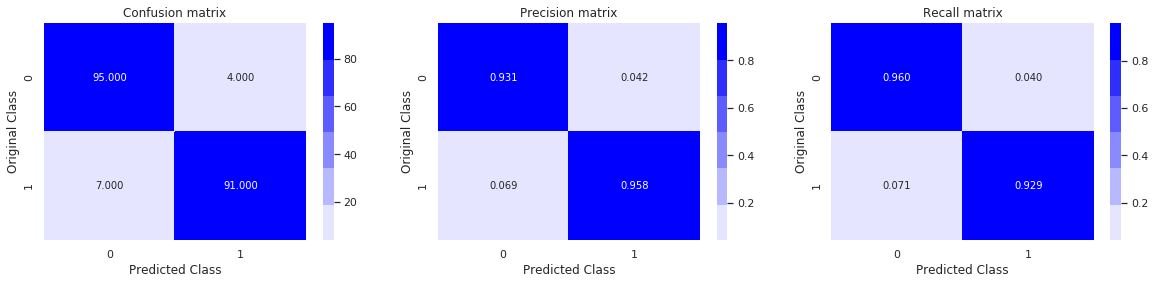

In [61]:
xgb_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train.values)

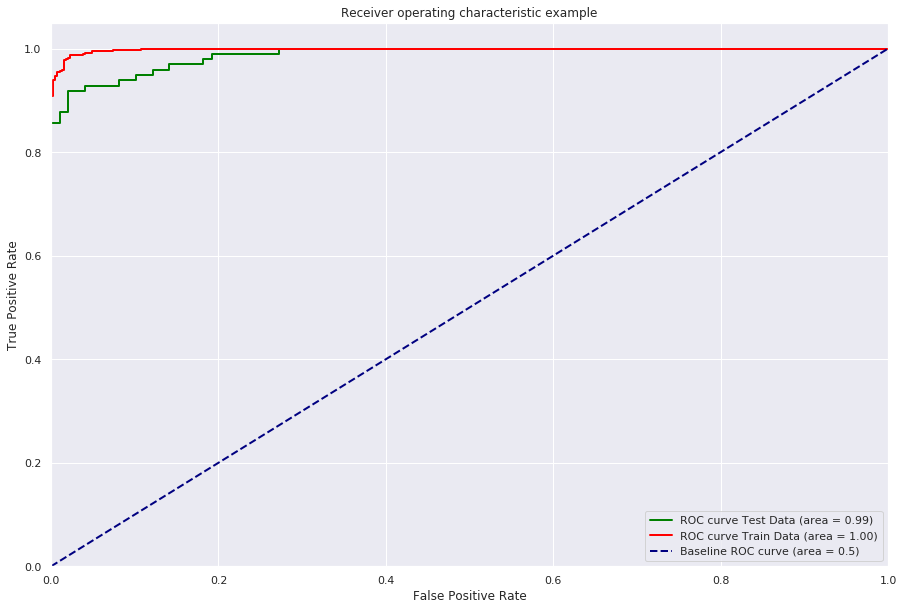

In [62]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 7. Neural Networks (Optional, just tried out for the sake of comparing it with other models)

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Dropout
from keras import optimizers
from keras.metrics import binary_crossentropy
from keras.utils import to_categorical

Using TensorFlow backend.


In [65]:
import warnings
warnings.filterwarnings("ignore")

#Initializing parameters
epochs = 50
batch_size = 16
first_layer_input = X_train.shape[1]

#Define the neural network architecture
model = Sequential()
model.add(Dense(32, input_shape=(first_layer_input, ), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [66]:
#Define optimzers for training the neural network
optim=optimizers.Adam(lr=0.001)
model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
#Start training the neural network
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3, shuffle=True)

Train on 550 samples, validate on 237 samples
Epoch 1/50
550/550 [==============================] - 0s 131us/step - loss: 0.0176 - acc: 0.9945 - val_loss: 0.2642 - val_acc: 0.9241
Epoch 2/50
550/550 [==============================] - 0s 132us/step - loss: 0.0173 - acc: 0.9927 - val_loss: 0.2713 - val_acc: 0.9241
Epoch 3/50
550/550 [==============================] - 0s 137us/step - loss: 0.0160 - acc: 0.9964 - val_loss: 0.2747 - val_acc: 0.9241
Epoch 4/50
550/550 [==============================] - 0s 124us/step - loss: 0.0153 - acc: 0.9982 - val_loss: 0.2781 - val_acc: 0.9283
Epoch 5/50
550/550 [==============================] - 0s 117us/step - loss: 0.0141 - acc: 0.9982 - val_loss: 0.2814 - val_acc: 0.9283
Epoch 6/50
550/550 [==============================] - 0s 118us/step - loss: 0.0135 - acc: 0.9982 - val_loss: 0.2865 - val_acc: 0.9283
Epoch 7/50
550/550 [==============================] - 0s 118us/step - loss: 0.0127 - acc: 0.9982 - val_loss: 0.2913 - val_acc: 0.9283
Epoch 8/50
550/5


F1 Score = 0.9593908629441623

Accuracy = 0.9593908629441624

Recall = 0.9693877551020408

ROC-AUC = 0.959441352298495

-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        99
           1       0.95      0.97      0.96        98

   micro avg       0.96      0.96      0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



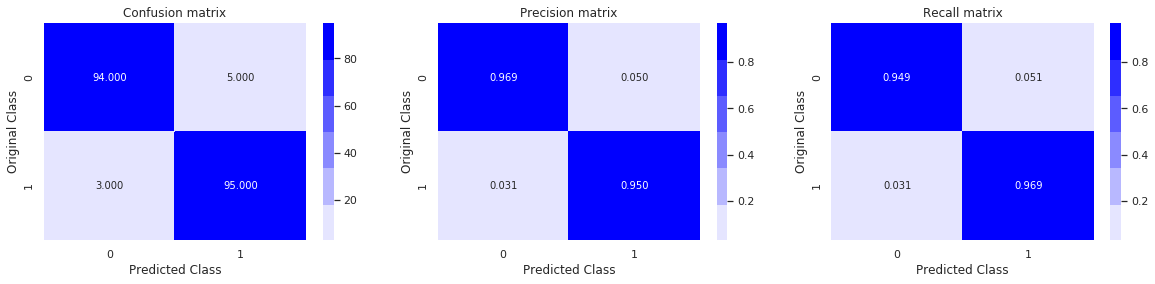

In [75]:
nn_results = dict()

#Compute the F1 score 
f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
nn_results['F1_Score'] = f1_score
print('\nF1 Score = {}'.format(f1_score))      


#Calculate overall accuracy of the model
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
nn_results['Accuracy'] = accuracy
print('\nAccuracy = {}'.format(accuracy))

#Calculate overall recall_score of the model
recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
nn_results['Recall'] = recall
print('\nRecall = {}'.format(recall))

#Calculate overall roc-auc of the model
#Calibrate the model
roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_pred)
nn_results['ROC-AUC'] = roc_auc
print('\nROC-AUC = {}\n'.format(roc_auc))   

#Display the classification report having individual class recalls and precision values.
print('-------------------------')
print('| Classifiction Report  |')
print('-------------------------')
classification_report = metrics.classification_report(y_test, y_pred)

#Store report in nn_results
nn_results['Classification_Report'] = classification_report
print(classification_report)

#Add the trained  model to the nn_results
nn_results['Model'] = model

#Plot the confusion matrix curve
plot_confusion_matrix(y_test, y_pred)

In [98]:
print('\n                             Accuracy        Recall      ROC-AUC')
print('                            ----------      --------     --------')

print('Logistic Regression        : {:.04}%          {:.04}%       {:.04}'.format(log_reg_grid_results['Accuracy'] * 100, 
                                                                                  log_reg_grid_results['Recall'] * 100, 
                                                                                  log_reg_grid_results['ROC-AUC']))
print('KNN Classifier             : {:.04}%          {:.04}%       {:.04}'.format(knn_grid_results['Accuracy'] * 100, 
                                                                                  knn_grid_results['Recall'] * 100, 
                                                                                  knn_grid_results['ROC-AUC']))
print('Decision Trees Classifier  : {:.04}%          {:.04}%       {:.04}'.format(dt_grid_results['Accuracy'] * 100, 
                                                                                  dt_grid_results['Recall'] * 100,
                                                                                  dt_grid_results['ROC-AUC']))
print('Linear SVC                 : {:.04}%          {:.04}%       {:.04}'.format(svc_grid_results['Accuracy'] * 100, 
                                                                                  svc_grid_results['Recall'] * 100, 
                                                                                  svc_grid_results['ROC-AUC']))
print('Random Forest Classifier   : {:.04}%           {:.04}%       {:.04}'.format(rf_grid_results['Accuracy'] * 100, 
                                                                                  rf_grid_results['Recall'] * 100, 
                                                                                  rf_grid_results['ROC-AUC']))
print('XGBoost Classifier         : {:.04}%          {:.04}%       {:.04}'.format(xgb_grid_results['Accuracy'] * 100, 
                                                                                  xgb_grid_results['Recall'] * 100, 
                                                                                  xgb_grid_results['ROC-AUC']))
print('Neural Networks            : {:.04}%          {:.04}%       {:.04}'.format(nn_results['Accuracy'] * 100, 
                                                                                  nn_results['Recall'] * 100, 
                                                                                  nn_results['ROC-AUC']))


                             Accuracy        Recall      ROC-AUC
                            ----------      --------     --------
Logistic Regression        : 88.83%          97.96%       0.9887
KNN Classifier             : 92.89%          87.76%       0.9853
Decision Trees Classifier  : 89.85%          81.63%       0.9445
Linear SVC                 : 91.88%          84.69%       0.9856
Random Forest Classifier   : 93.4%           88.78%       0.9861
XGBoost Classifier         : 94.42%          92.86%       0.9874
Neural Networks            : 95.94%          96.94%       0.9594


## Performing the same analysis with Oversampling Technique (SMOTE)

### Split the original imbalanced dataset into train and test set

In [16]:
from sklearn.model_selection import train_test_split

print("Shape of the original dataset: ", data.shape)

X=data.drop("Class", axis=1)
y=data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=state)

print('\nNumber of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Shape of the original dataset:  (284807, 31)

Number of data points in train data: 227845
Number of data points in test data: 56962


### Data Oversampling using SMOTE

In [17]:
#Get information about the class labels before applying SMOTE
print("Before oversampling, number of fraud transactions: ",y_train.value_counts()[1])
print("Before oversampling, number of non fraud transactions: ",y_train.value_counts()[0])

Before oversampling, number of fraud transactions:  394
Before oversampling, number of non fraud transactions:  227451


In [18]:
from imblearn.over_sampling import SMOTE
smote_obj = SMOTE(sampling_strategy='minority',random_state=state)

#Adding synthetic points at this stage
X_train, y_train = smote_obj.fit_sample(X_train, y_train)

In [19]:
print("After oversampling, number of fraud transactions: ",sum(y_train==1))
print("After oversampling, number of non fraud transactions: ",sum(y_train==0))

After oversampling, number of fraud transactions:  227451
After oversampling, number of non fraud transactions:  227451


### 1. Logistic Regression Classifier

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from datetime import datetime as dt
from scipy import stats

st=dt.now()

tuned_parameters = {'C': stats.uniform(0,10000),
                    'penalty': ['l1','l2'] } #C values used for cross validation

model = LogisticRegression(n_jobs=-1, random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  6.9min remaining:   36.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.3min finished


Time taken to complete random search:  0:07:29.236845


In [22]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=174.90270931152628, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=48,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 174.90270931152628, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9909727979229617



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:10.079332


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.005715


---------------------
|      F1 Score      |
---------------------

    0.9741933218636986


---------------------
|      Accuracy      |
---------------------

    0.9741933218636986


---------------------
|      Recall        |
---------------------

    0.9081632653061225


---------------------
|      ROC AUC       |
---------------------

    0.9749633568959379


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.91      0.11        98

   micro avg       0.97      0.97      0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



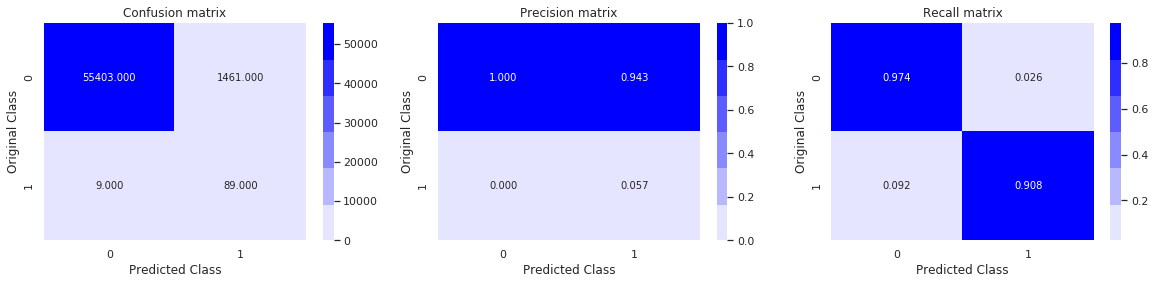

In [23]:
log_reg_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train)

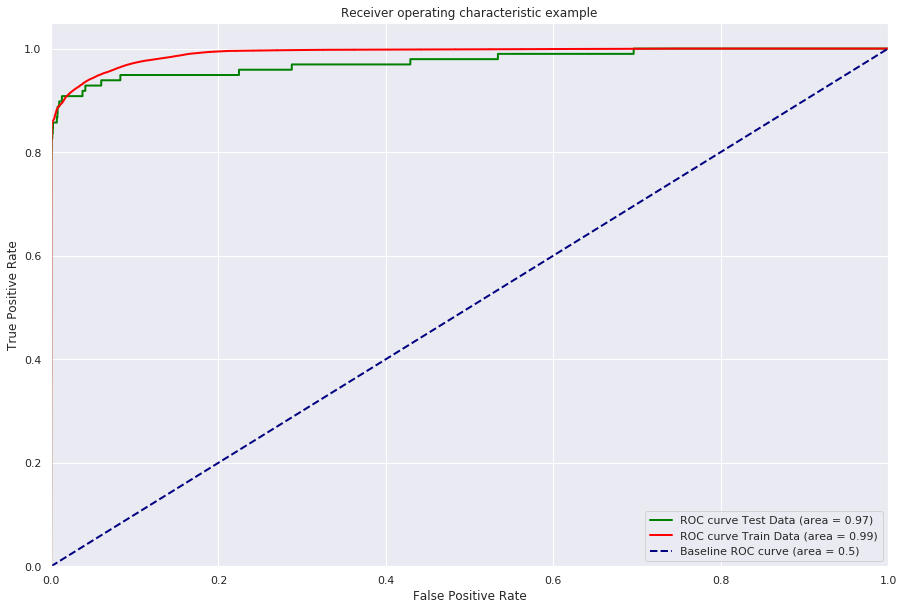

In [24]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

In [25]:
import gc
gc.collect()

del(model, trained_model, rsearch_cv)

In [26]:
log_reg_grid_results

{'Training_Time': datetime.timedelta(seconds=10, microseconds=79332),
 'Testing_Time': datetime.timedelta(microseconds=5715),
 'Predicted': array([0, 0, 0, ..., 0, 0, 0]),
 'F1_Score': 0.9741933218636986,
 'Accuracy': 0.9741933218636986,
 'Recall': 0.9081632653061225,
 'ROC-AUC': 0.9749633568959379,
 'Classification_Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.99     56864\n           1       0.06      0.91      0.11        98\n\n   micro avg       0.97      0.97      0.97     56962\n   macro avg       0.53      0.94      0.55     56962\nweighted avg       1.00      0.97      0.99     56962\n',
 'Model': LogisticRegression(C=174.90270931152628, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=48,
           solver='warn', tol=0.0001, verbose=0, warm_start=False)}

### 2. KNN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

st=dt.now()

tuned_parameters = {'n_neighbors': [3,5,7,9,11,13],
                    'weights': ['uniform','distance']}

model = KNeighborsClassifier(n_jobs=-1, p=2, metric='minkowski')

rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 177.6min remaining: 15.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 181.6min finished


Time taken to complete random search:  3:01:41.284961


In [28]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
           weights='distance')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'weights': 'distance', 'n_neighbors': 13}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9996812500274784



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:02.305079


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:02:39.129933


---------------------
|      F1 Score      |
---------------------

    0.9965064428917524


---------------------
|      Accuracy      |
---------------------

    0.9965064428917524


---------------------
|      Recall        |
---------------------

    0.8571428571428571


---------------------
|      ROC AUC       |
---------------------

    0.9326478393129903


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.86      0.46        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.66      0.93      0.73     56962
weighted avg       1.00      1.00      1.00     56962



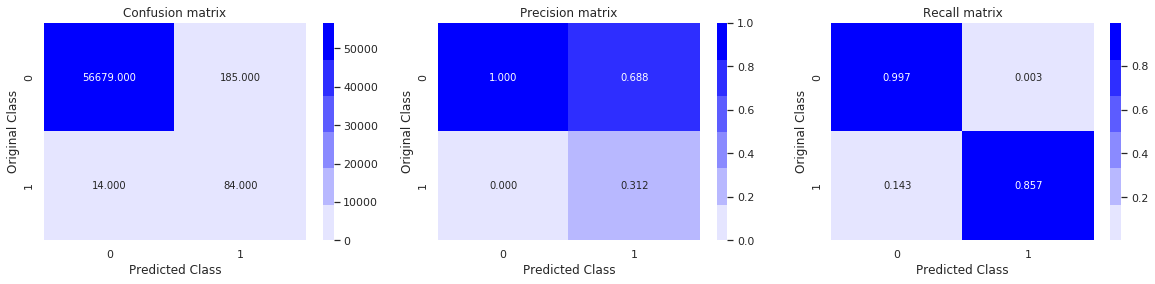

In [29]:
knn_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train)

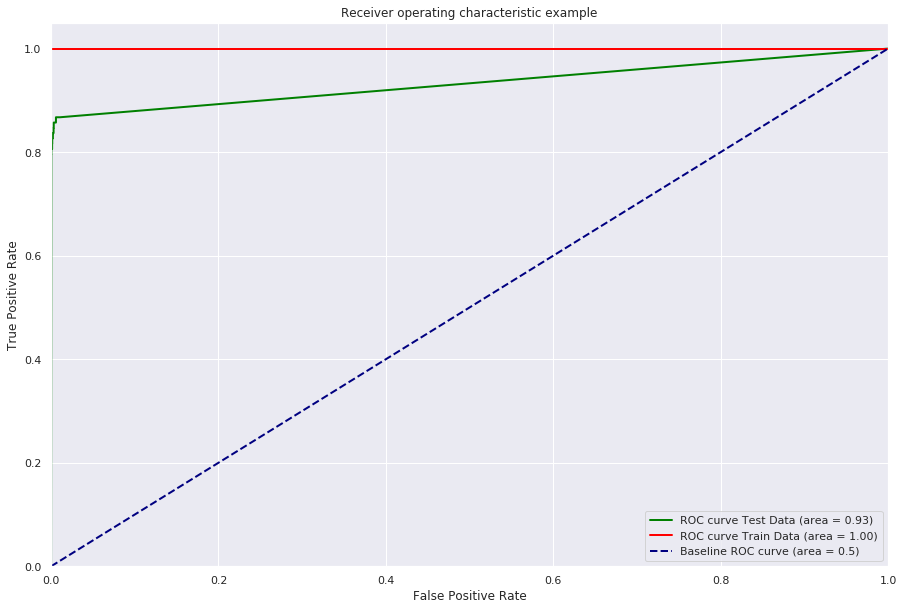

In [30]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 3. Decision Trees Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier


st=dt.now()

tuned_parameters = {'max_depth': np.arange(1,10,1),
                    'criterion': ['gini','entropy'],
                    'min_samples_split': np.arange(0.1,1.0,0.1),
                    'min_samples_leaf' : np.arange(1,10,1),
                    'min_weight_fraction_leaf' : [0.0,0.1,0.2,0.3,0.4],
                    'max_features': ['auto','sqrt','log2']} 

model = DecisionTreeClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   15.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.1s finished


Time taken to complete random search:  0:00:17.730190


In [32]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=0.1,
            min_weight_fraction_leaf=0.1, presort=False, random_state=48,
            splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'min_weight_fraction_leaf': 0.1, 'min_samples_split': 0.1, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'gini'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9636516148000225



Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:01.498290


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.006884


---------------------
|      F1 Score      |
---------------------

    0.9846564376250834


---------------------
|      Accuracy      |
---------------------

    0.9846564376250834


---------------------
|      Recall        |
---------------------

    0.8163265306122449


---------------------
|      ROC AUC       |
---------------------

    0.9513398599451034


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.82      0.15        98

   micro avg       0.98      0.98      0.98     56962
   macro avg       0.54      0.90      0.57     56962
weighted avg       1.00      0.98      0.99     56962



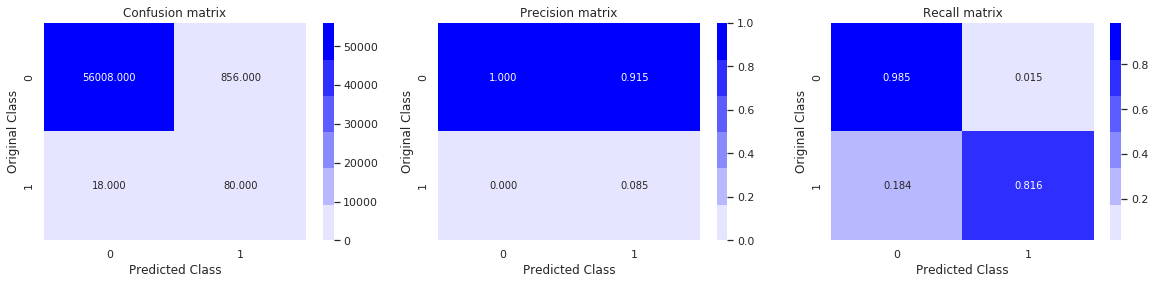

In [33]:
dt_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train)

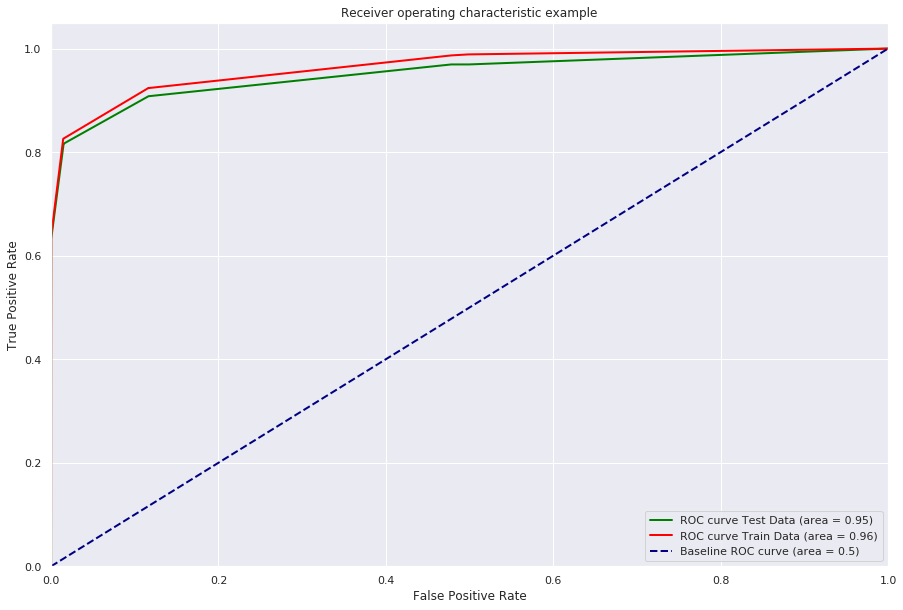

In [34]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

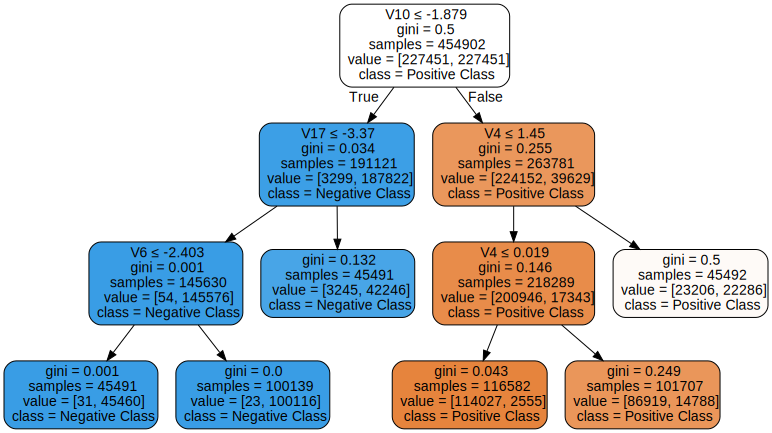

In [36]:
#https://scikit-learn.org/stable/modules/tree.html
def visualize_tree(trained_clf, f_names, filename):
    from sklearn import tree
    import graphviz
    dot_data = tree.export_graphviz(decision_tree=trained_clf, out_file=None, max_depth=3, filled=True, rounded=True, special_characters=True, impurity=True, feature_names=f_names, class_names=['Positive Class','Negative Class'])  
    graph = graphviz.Source(dot_data)  
    graph.render(filename, format='png') 
    return graph

#Call the function above and pass a filename onto it.
f_names=[i for i in X.columns]

graph=visualize_tree(trained_model, f_names, 'Credit_Card_Tree.png')
graph

In [37]:
import gc
gc.collect()

del(model, trained_model, rsearch_cv)

### 4. Linear SVM Classifier

In [ ]:
from sklearn.svm import SVC

st=dt.now()
tuned_parameters = {'C':np.logspace(-3,4,25), 
                    'gamma':np.logspace(-3,1,8)}

model = SVC(kernel='linear',random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 483.8min


In [ ]:
print_grid_search_attributes(rsearch_cv)

In [ ]:
svc_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train)

In [ ]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

In [ ]:
import gc
gc.collect()

del(model, trained_model, rsearch_cv)

### 5. Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

st=dt.now()
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,1000,1500,2000,3000],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}

model = RandomForestClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 252.8min remaining: 22.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 261.0min finished


Time taken to complete random search:  4:24:21.229768


In [39]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='sqrt', max_leaf_nodes=500,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=48, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 25, 'max_leaf_nodes': 500, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	A

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:03:24.267284


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.446870


---------------------
|      F1 Score      |
---------------------

    0.9978406657069625


---------------------
|      Accuracy      |
---------------------

    0.9978406657069625


---------------------
|      Recall        |
---------------------

    0.8571428571428571


---------------------
|      ROC AUC       |
---------------------

    0.9787046501211627


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.86      0.58        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.72      0.93      0.79     56962
weighted avg       1.00      1.00      1.00     56962



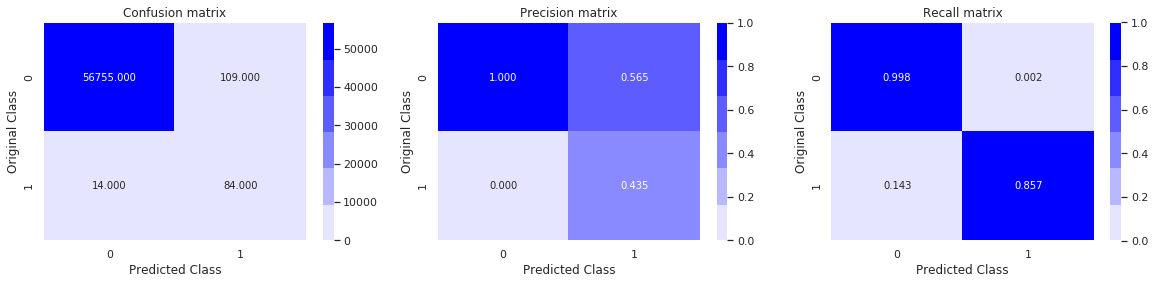

In [40]:
rf_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels=y_train)

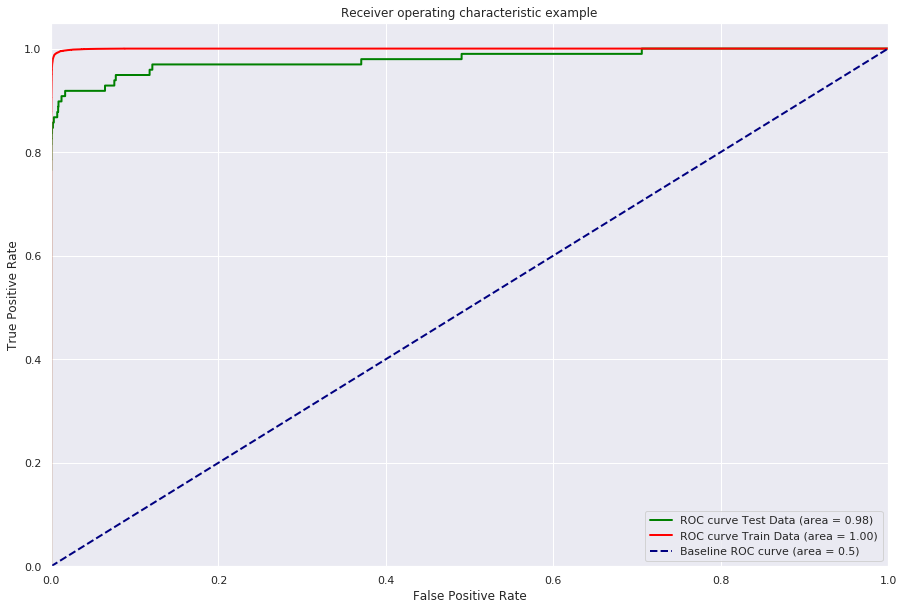

In [41]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

### 6. XGBoost Classifier

In [42]:
from xgboost import XGBClassifier

st=dt.now()
tuned_parameters = {'learning_rate':[0.1,0.01,0.001,0.0001],
                    'n_estimators':[10,25,50,100,250,500,750,1000,1500,2000,3000],
                    'subsample':[0.6,0.7,0.8],
                    'min_child_weight':[3,5,7,9],
                    'max_depth': [3,4,5,6,7,9],
                    'colsample_bytree':[0.6,0.7,0.8],
                    'gamma':[0,0.5,1]}

model = XGBClassifier(random_state=state)
rsearch_cv = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=5, scoring='roc_auc', 
                                n_jobs=-1,
                                verbose=5,
                                random_state=state)
rsearch_cv.fit(X_train, y_train)

print("Time taken to complete random search: ",dt.now()-st)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 227.1min remaining: 19.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 233.4min finished


Time taken to complete random search:  4:17:40.461677


In [43]:
print_grid_search_attributes(rsearch_cv)

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=3, missing=None, n_estimators=750,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=48, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'subsample': 0.6, 'n_estimators': 750, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of bes

Training the model...
Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:24:39.380942


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:02.056257


---------------------
|      F1 Score      |
---------------------

    0.9992802219023208


---------------------
|      Accuracy      |
---------------------

    0.9992802219023208


---------------------
|      Recall        |
---------------------

    0.826530612244898


---------------------
|      ROC AUC       |
---------------------

    0.9659689283704478


-------------------------
| Classifiction Report  |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.83      0.80        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.89      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



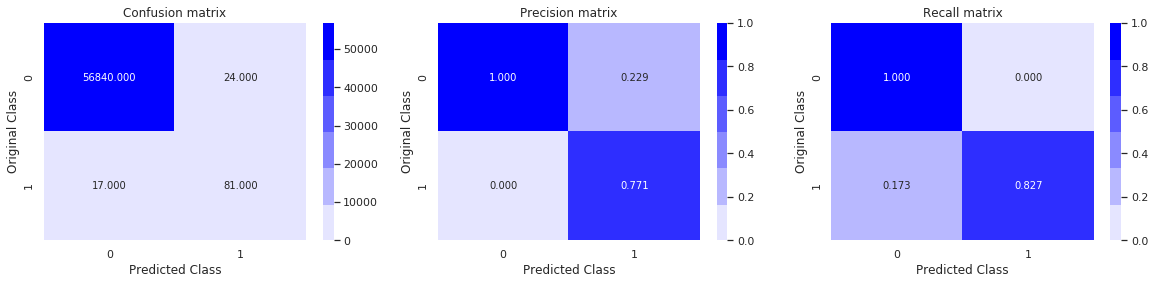

In [53]:
xgb_grid_results, trained_model =  model_report(rsearch_cv, X_train, y_train, X_test.values, y_test, class_labels=y_train)

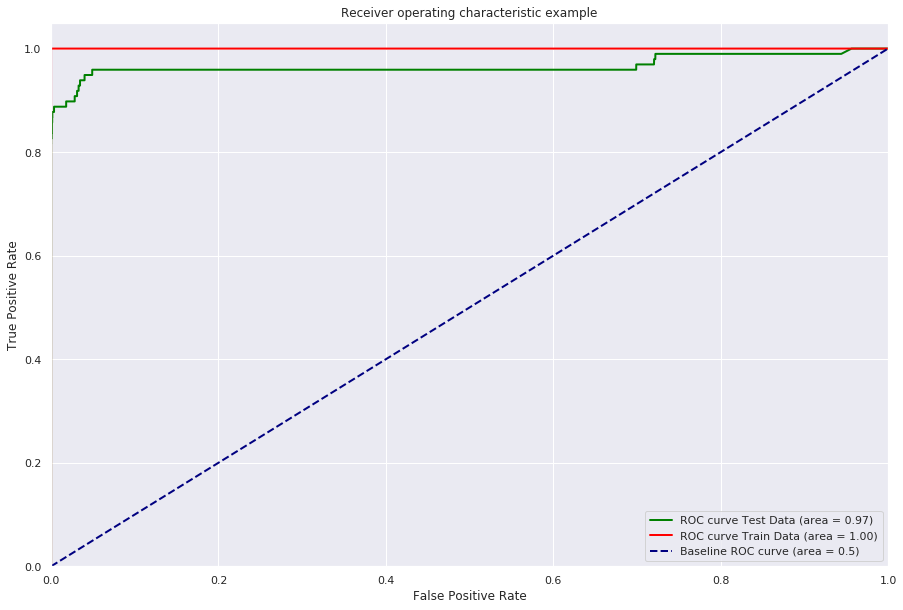

In [54]:
#Calibrate the model
from sklearn.calibration import CalibratedClassifierCV
sig_clf = CalibratedClassifierCV(trained_model, method="sigmoid")
sig_clf.fit(X_train, y_train)

#Plot the ROC curve
plot_roc_curve(sig_clf, X_train, y_train, X_test, y_test)

In [55]:
print('\n                             Accuracy        Recall      ROC-AUC')
print('                            ----------      --------     --------')

print('Logistic Regression        : {:.04}%          {:.04}%       {:.04}'.format(log_reg_grid_results['Accuracy'] * 100, 
                                                                                  log_reg_grid_results['Recall'] * 100, 
                                                                                  log_reg_grid_results['ROC-AUC']))
print('KNN Classifier             : {:.04}%          {:.04}%       {:.04}'.format(knn_grid_results['Accuracy'] * 100, 
                                                                                  knn_grid_results['Recall'] * 100, 
                                                                                  knn_grid_results['ROC-AUC']))
print('Decision Trees Classifier  : {:.04}%          {:.04}%       {:.04}'.format(dt_grid_results['Accuracy'] * 100, 
                                                                                  dt_grid_results['Recall'] * 100,
                                                                                  dt_grid_results['ROC-AUC']))

print('Random Forest Classifier   : {:.04}%           {:.04}%       {:.04}'.format(rf_grid_results['Accuracy'] * 100, 
                                                                                  rf_grid_results['Recall'] * 100, 
                                                                                  rf_grid_results['ROC-AUC']))
print('XGBoost Classifier         : {:.04}%          {:.04}%       {:.04}'.format(xgb_grid_results['Accuracy'] * 100, 
                                                                                  xgb_grid_results['Recall'] * 100, 
                                                                                  xgb_grid_results['ROC-AUC']))



                             Accuracy        Recall      ROC-AUC
                            ----------      --------     --------
Logistic Regression        : 97.42%          90.82%       0.975
KNN Classifier             : 99.65%          85.71%       0.9326
Decision Trees Classifier  : 98.47%          81.63%       0.9513
Random Forest Classifier   : 99.78%           85.71%       0.9787
XGBoost Classifier         : 99.93%          82.65%       0.966


### Conclusion

We can clearly see that under oversampling the accuracies achieved by each of these models is actually better 
than what we saw in undersampling. But we can also see that recall has suffered a bit under oversampling.

Undersampling

|            Model              | Accuracy    |    Recall  |    ROC-AUC |
| ---  | ---  |  --- |  --- | 
|Logistic Regression        | 88.83%      |    97.96%  |     0.9887 |
|KNN Classifier             | 92.89%      |    87.76%  |    0.9853  |
|Decision Trees Classifier  | 89.85%      |    81.63%  |     0.9445 |
|Random Forest Classifier   | 93.4%       |    88.78%  |     0.9861 |
|XGBoost Classifier         | 94.42%      |    92.86%  |     0.9874 |
    
    
Oversampling

|      Model                      | Accuracy      |  Recall     | ROC-AUC|
| --- | ---  |  --- | ---|
|Logistic Regression        | 97.42%      |    90.82%    |   0.975    |
|KNN Classifier             | 99.65%      |    85.71%    |   0.9326   |
|Decision Trees Classifier  | 98.47%      |    81.63%    |   0.9513   |
|Random Forest Classifier   | 99.78%      |     85.71%   |    0.9787  |
|XGBoost Classifier         | 99.93%      |    82.65%    |   0.966    |

We can cleary see that Random Forest Classifier and XGBoost is performing better that the rest of the models.
